# **Assignment1-NLP**

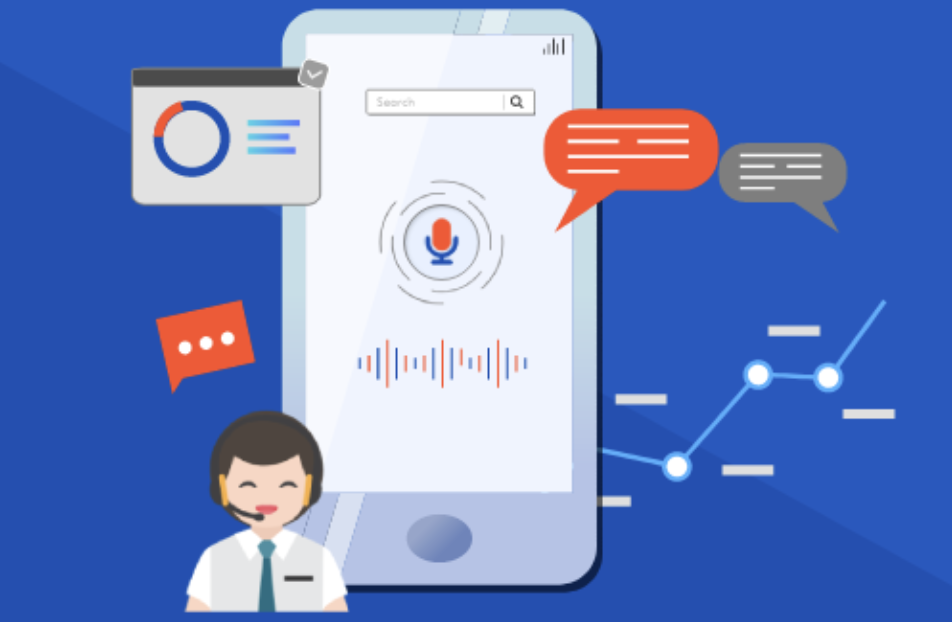

# **Automatic Speech Recognition**

Speech Recognition, also known as Automatic Speech Recognition (ASR), is a technology that converts spoken language into written text. It plays a crucial role in bridging the gap between human speech and computer understanding, enabling applications like virtual assistants, real-time transcription, and voice-controlled systems. ASR systems typically process audio signals by extracting features such as spectrograms, then using Artificial Intelligence-based model sto decode these signals into meaningful word sequences. In the context of natural language processing (NLP), ASR provides the first step in enabling machines to understand and respond to spoken language.

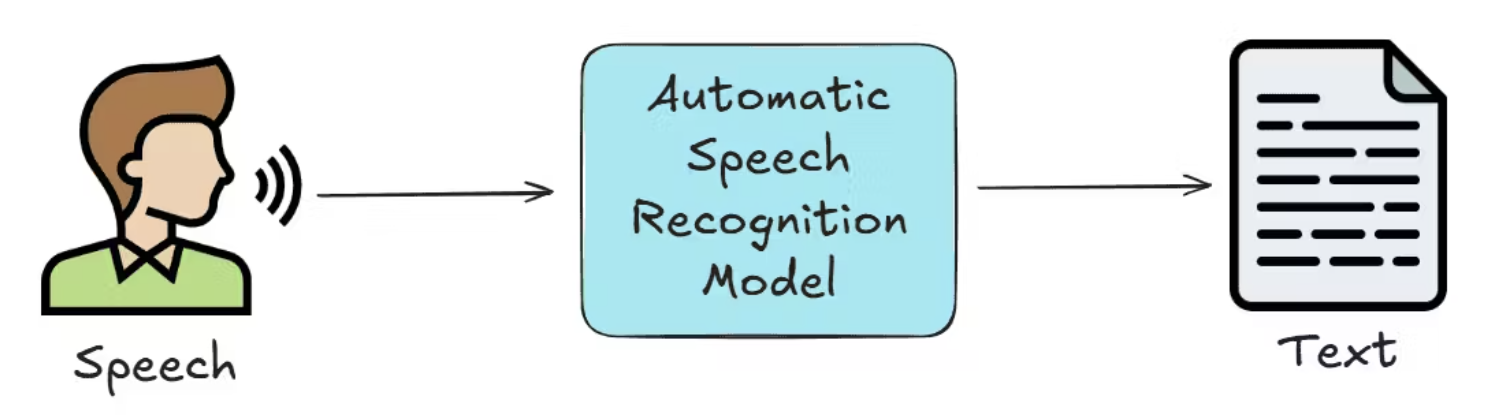

# **Dataset**

LibriSpeech is a widely used speech recognition dataset designed for training and evaluating automatic speech recognition (ASR) systems. It was introduced by Vassil Panayotov et al. in 2015 and has since become one of the standard benchmarks in the ASR research community.

LibriSpeech is a publicly available speech recognition dataset consisting of approximately 1,000 hours of English speech derived from audiobooks that are part of the LibriVox project. It was created to support training and evaluation of automatic speech recognition (ASR) systems. The audio is sampled at 16 kHz and is accompanied by accurate, time-aligned transcripts. LibriSpeech includes multiple subsets such as "train-clean," "train-other," "dev-clean," and "test-clean," allowing researchers to benchmark models under varying levels of audio quality and complexity. Its accessibility, size, and quality have made it one of the most widely used datasets in speech and NLP research.

***Note on Dataset Usage:***

The corresponding dataset used in this assignment is a subset of the LibriSpeech corpus and has been specifically selected and uploaded on Canvas. To ensure consistency in evaluation and reproducibility, you must not use any external data or download additional LibriSpeech files. Only use the audio and transcript files provided in the assignment folder on Canvas.



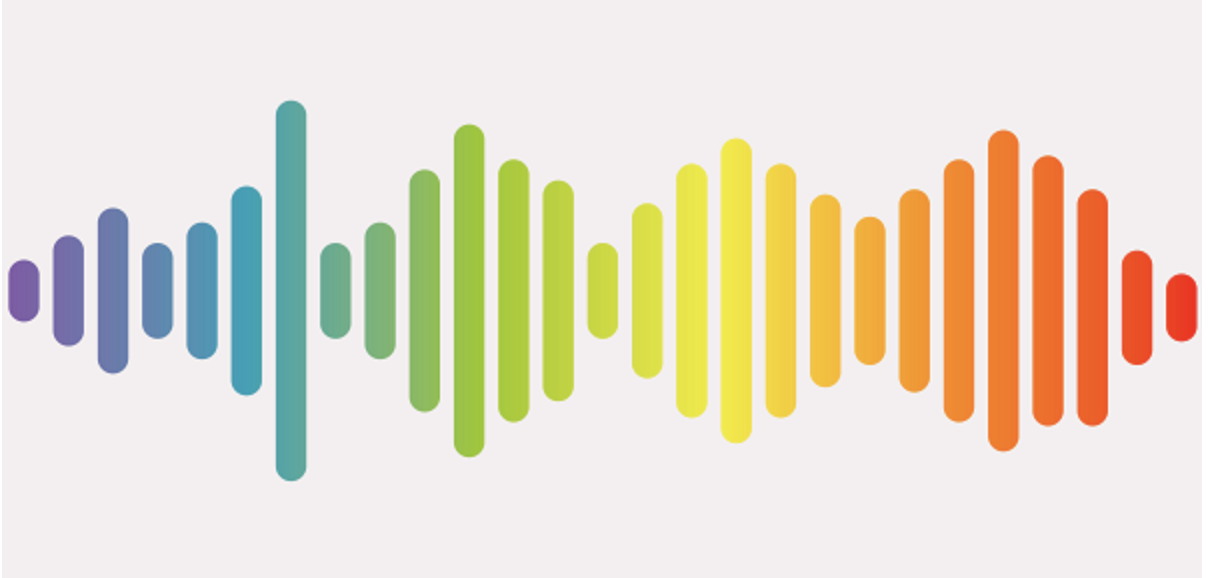

# **Step-by-Step Guide: From Audio to Clean Text**

# **Step 1: Read the Audio Files**

Assume the corresponding dataset includes:

*   Several .flac audio files (e.g., 84-121123-0000.flac)
*   A transcript file (e.g., transcripts.txt)


In [1]:
!pip install openai-whisper
# Install FFmpeg
!sudo apt update && sudo apt install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.3 MB

**Question 1:** Using Whisper, load Audio and Transcribe.
In addition, can you  answer the following questions:

*   What is the sampling rate of the provided audio files, and why is it important for speech recognition?
*   What is the duration of each audio file?
*   What is the bit depth of the audio files, and how does it affect the quality of speech recognition?
*  What is the file size of each audio file, and how might the size relate to audio quality or length?
*   For each audio, plot it over time.
*   List item



For every question, be sure to anlayze and discuss your response.

Note: For answering this questions, python coding is needed. You can use libraries, such as librosa, or pydub.
For more information, please refer to:

**Librosa**: https://librosa.org/doc/latest/index.html

**pydub:** https://github.com/jiaaro/pydub


You can refer to tutorials at:

https://youtu.be/B31RiiRt_TE?si=76VKAir9xwG8hH2V

https://youtu.be/vJ_WL9aYfNI?si=Hx8OFbHfqJn07uQa

## Question 1 Solution

Uploading the audio folder and unzipping it

In [2]:
##Loading file from session storage and unzipping it
!unzip /content/my_audio_files.zip -d /content/unzipped_audio_data

Archive:  /content/my_audio_files.zip
   creating: /content/unzipped_audio_data/127105/
  inflating: /content/unzipped_audio_data/__MACOSX/._127105  
  inflating: /content/unzipped_audio_data/127105/121-127105-0036.flac  
  inflating: /content/unzipped_audio_data/__MACOSX/127105/._121-127105-0036.flac  
  inflating: /content/unzipped_audio_data/127105/121-127105-0020.flac  
  inflating: /content/unzipped_audio_data/__MACOSX/127105/._121-127105-0020.flac  
  inflating: /content/unzipped_audio_data/127105/121-127105-0000.flac  
  inflating: /content/unzipped_audio_data/__MACOSX/127105/._121-127105-0000.flac  
  inflating: /content/unzipped_audio_data/127105/121-127105-0016.flac  
  inflating: /content/unzipped_audio_data/__MACOSX/127105/._121-127105-0016.flac  
  inflating: /content/unzipped_audio_data/127105/121-127105-0017.flac  
  inflating: /content/unzipped_audio_data/__MACOSX/127105/._121-127105-0017.flac  
  inflating: /content/unzipped_audio_data/127105/121-127105-0001.flac  
  i

Choosing appropriate whisper model

In [3]:
import whisper
import os # To list files and iterate

# Choosing a model size
model_name = "medium"
model = whisper.load_model(model_name)

print(f"Whisper model '{model_name}' loaded successfully.")

100%|██████████████████████████████████████| 1.42G/1.42G [00:14<00:00, 106MiB/s]


Whisper model 'medium' loaded successfully.


Loading and Transcribing the data

In [4]:
unzipped_dir = "/content/unzipped_audio_data/127105"

# List all files in the directory, specifically including .flac
audio_files = [f for f in os.listdir(unzipped_dir) if f.lower().endswith(('.mp3', '.wav', '.flac', '.m4a'))]

if not audio_files:
    print(f"No audio files found in {unzipped_dir} with expected extensions (.mp3, .wav, .flac, .m4a).")
    print(f"Files found in directory: {os.listdir(unzipped_dir)}")
else:
    print(f"Found {len(audio_files)} audio files to transcribe.")
    for audio_file_name in audio_files:
        audio_file_path = os.path.join(unzipped_dir, audio_file_name)
        print(f"\n--- Transcribing: {audio_file_path} ---")

        try:
            result = model.transcribe(audio_file_path)
            print(result["text"])

            # save to a text file, create a .txt file next to each .flac file
            output_filename = os.path.splitext(audio_file_name)[0] + ".txt"
            output_path = os.path.join(unzipped_dir, output_filename)
            with open(output_path, "w", encoding="utf-8") as f:
                f.write(result["text"])
            print(f"Transcription saved to: {output_path}")

        except Exception as e:
            print(f"Error transcribing {audio_file_name}: {e}")

Found 37 audio files to transcribe.

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0009.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 She has been dead these 20 years.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0009.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0019.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Mrs. Griffin, however, expressed the need for a little more light.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0019.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0000.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It was this observation that drew from Douglas. Not immediately, but later in the evening. A reply that had the interesting consequence to which I call attention.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0000.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0004.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The story's written.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0004.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0023.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Let me say here distinctly, to have done with it, that this narrative, from an exact transcript of my own, made much later, is what I shall presently give.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0023.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0027.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 He had for his own town residence a big house filled with the spoils of travel and the trophies of the chase. But it was to his country home, an old family place in Essex, that he wished her immediately to proceed.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0027.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0017.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It was almost the tone of hope. Everybody will stay.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0017.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0029.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 There were plenty of people to help, but of course the young lady who should go down as governess would be in supreme authority.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0029.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0022.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Well, if I don't know who she was in love with, I know who he was.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0022.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0008.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 He hung fire again, a woman's.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0008.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0033.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It was the beauty of it.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0033.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0034.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It sounded dull, it sounded strange, and all the more so because of his main condition, which was...
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0034.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0005.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 I could write to my man and enclose the key. He could send down the packet as he finds it.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0005.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0035.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 She promised to do this, and she mentioned to me that when for a moment, disburdened, delighted, he held her hand, thanking her for the sacrifice. She already felt rewarded.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0035.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0016.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Probably not till the second post.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0016.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0014.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 You are acute.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0014.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0007.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 To this his answer was prompt. Oh, thank God no, and is the record yours?
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0007.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0020.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Who was it she was in love with? The story will tell, I took upon myself to reply. Oh, I can't wait for the story. The story won't tell, said Douglas. Not in any literal vulgar way. More's the pity, then.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0020.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0002.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 cried one of the women. He took no notice of her. He looked at me, but as if, instead of me, he saw what he spoke of.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0002.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0028.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The awkward thing was that they had practically no other relations, and that his own affairs took up all his time.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0028.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0030.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 I don't anticipate.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0030.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0025.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The departing ladies who had said they would stay didn't, of course, thank heaven, stay. They departed in consequence of arrangements made. In a rage of curiosity, as they professed, produced by the touches with which he had already worked us up.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0025.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0031.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 She was young, untried, nervous. It was a vision of serious duties and little company. Of really great loneliness.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0031.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0021.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Won't you tell Douglas?
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0021.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0003.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 There was a unanimous groan at this, and much reproach, after which in his preoccupied way he explained,
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0003.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0013.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 You'll easily judge why when you hear. Because the thing had been such a scare? He continued to fix me.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0013.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0018.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 cry the ladies whose departure had been fixed.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0018.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0026.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The first of these touches conveyed that the written statement took up the tale at a point after it had, in a manner, begun.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0026.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0012.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 It wasn't simply that she said so, but that I knew she hadn't. I was sure I could see.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0012.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0032.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Yes, but that's just the beauty of her passion.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0032.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0036.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 But was that all her reward? One of the ladies asked.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0036.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0001.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Someone else told a story not particularly effective, which I saw he was not following.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0001.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0015.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 He quitted the fire and dropped back into his chair.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0015.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0024.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Poor Douglas, before his death, when it was in sight, committed to me the manuscript that reached him on the third of these days, and that, on the same spot, with immense effect, he began to read to our hushed little circle on the night of the fourth.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0024.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0011.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 She was the most agreeable woman I've ever known in her position. She would have been worthy of any whatever.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0011.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0010.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 She sent me the pages in question before she died.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0010.txt

--- Transcribing: /content/unzipped_audio_data/127105/121-127105-0006.flac ---


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The others resented postponement, but it was just his scruples that charmed me.
Transcription saved to: /content/unzipped_audio_data/127105/121-127105-0006.txt


IMPORTING NECESSARY LIBRARIES AND DEFINING THE VARIABLE WITH THE AUDIO FILE

In [5]:
import librosa
import os

# Your unzipped directory path
unzipped_dir = "/content/unzipped_audio_data/127105"

# list of all .flac files in this directory
flac_files = [f for f in os.listdir(unzipped_dir) if f.lower().endswith(('.flac'))]

What is the sampling rate of the provided audio files, and why is it important for speech recognition?

Here, I am using the librosa library to load the audio data and find the sampling rate.

The sampling rate is crucial for speech recognition because it directly determines the maximum frequency that can be accurately represented in the digital audio signal. According to the Nyquist-Shannon sampling theorem, the sampling rate must be at least twice the highest frequency we wish to capture.

For human speech, most critical phonetic information is within the frequency range of 0 Hz to 8 kHz. Therefore, a sampling rate of at least 16 kHz is necessary to fully capture these essential speech components without losing detail.

If the sampling rate is too low (e.g., 8 kHz), higher-frequency sounds, particularly from consonants (like 's' or 'f'), would be lost or distorted due to aliasing. This loss of information makes it significantly more challenging for a speech recognition model to accurately differentiate between words and phonemes, leading to a substantial decrease in transcription accuracy.

Conversely, while a higher sampling rate (e.g., 44.1 kHz or 48 kHz) captures more frequencies, sampling rates excessively beyond what's needed for speech (e.g., 96 kHz) provide diminishing returns for ASR accuracy. They primarily increase file size and computational overhead without contributing significant additional relevant information for speech understanding, as the human vocal tract doesn't produce meaningful sounds at those very high frequencies.

In [6]:
if flac_files:
    # loop through all files:
    print("Checking sampling rates for all FLAC files:")
    for filename in flac_files:
        full_path = os.path.join(unzipped_dir, filename)
        try:
            audio_data, sampling_rate = librosa.load(full_path, sr=None)

            print(f"File: {filename}, Sampling Rate: {sampling_rate} Hz")

        except Exception as e:
            print(f"Could not load {filename}: {e}")
else:
    print(f"No .flac files found in {unzipped_dir}. Please check the path and file extensions.")

Checking sampling rates for all FLAC files:
File: 121-127105-0009.flac, Sampling Rate: 16000 Hz
File: 121-127105-0019.flac, Sampling Rate: 16000 Hz
File: 121-127105-0000.flac, Sampling Rate: 16000 Hz
File: 121-127105-0004.flac, Sampling Rate: 16000 Hz
File: 121-127105-0023.flac, Sampling Rate: 16000 Hz
File: 121-127105-0027.flac, Sampling Rate: 16000 Hz
File: 121-127105-0017.flac, Sampling Rate: 16000 Hz
File: 121-127105-0029.flac, Sampling Rate: 16000 Hz
File: 121-127105-0022.flac, Sampling Rate: 16000 Hz
File: 121-127105-0008.flac, Sampling Rate: 16000 Hz
File: 121-127105-0033.flac, Sampling Rate: 16000 Hz
File: 121-127105-0034.flac, Sampling Rate: 16000 Hz
File: 121-127105-0005.flac, Sampling Rate: 16000 Hz
File: 121-127105-0035.flac, Sampling Rate: 16000 Hz
File: 121-127105-0016.flac, Sampling Rate: 16000 Hz
File: 121-127105-0014.flac, Sampling Rate: 16000 Hz
File: 121-127105-0007.flac, Sampling Rate: 16000 Hz
File: 121-127105-0020.flac, Sampling Rate: 16000 Hz
File: 121-127105-000

Duration of each audio file

In [7]:

if flac_files:
    # loop through all files:
    print("Checking sampling rates for all FLAC files:")
    for filename in flac_files:
        full_path = os.path.join(unzipped_dir, filename)
        try:
            # Load the audio file (but we only need its length, not the full audio data)
            # We use sr=None to get the original sampling rate, which is best for accurate duration calculation
            # We use duration=None to ensure the entire file is processed for duration
            audio_data, sr = librosa.load(full_path, sr=None, duration=None)

            # Calculate the duration
            # Duration in seconds = (Number of audio samples) / (Samples per second, i.e., sampling rate)
            duration_seconds = len(audio_data) / sr

            # Print the result
            print(f"File: {filename}, Duration: {duration_seconds:.2f} seconds")
        except Exception as e:
            print(f"Could not load {filename}: {e}")


Checking sampling rates for all FLAC files:
File: 121-127105-0009.flac, Duration: 2.29 seconds
File: 121-127105-0019.flac, Duration: 3.52 seconds
File: 121-127105-0000.flac, Duration: 9.88 seconds
File: 121-127105-0004.flac, Duration: 2.11 seconds
File: 121-127105-0023.flac, Duration: 10.91 seconds
File: 121-127105-0027.flac, Duration: 13.87 seconds
File: 121-127105-0017.flac, Duration: 2.69 seconds
File: 121-127105-0029.flac, Duration: 7.31 seconds
File: 121-127105-0022.flac, Duration: 5.08 seconds
File: 121-127105-0008.flac, Duration: 2.76 seconds
File: 121-127105-0033.flac, Duration: 2.35 seconds
File: 121-127105-0034.flac, Duration: 7.41 seconds
File: 121-127105-0005.flac, Duration: 5.82 seconds
File: 121-127105-0035.flac, Duration: 14.15 seconds
File: 121-127105-0016.flac, Duration: 2.03 seconds
File: 121-127105-0014.flac, Duration: 2.25 seconds
File: 121-127105-0007.flac, Duration: 5.79 seconds
File: 121-127105-0020.flac, Duration: 14.36 seconds
File: 121-127105-0002.flac, Durati

What is the bit depth of the audio files, and how does it affect the quality of speech recognition?

Bit depth affects speech recognition quality by determining the dynamic range and signal-to-noise ratio of the audio.

Higher bit depth (e.g., 16-bit, 24-bit) allows for a wider range between the quietest and loudest sounds, capturing subtle speech nuances and reducing quantization noise. This provides a cleaner signal, making it easier for ASR models to accurately distinguish speech from background noise and correctly identify phonemes.
Lower bit depth (e.g., 8-bit) limits the dynamic range and introduces more quantization noise. This can make quiet speech difficult to differentiate from noise and cause distortion, leading to significantly reduced ASR accuracy.
While 16-bit is often sufficient, higher bit depths (like 24-bit) offer more "headroom" for recording and processing without introducing artifacts, ultimately contributing to a more robust input for speech recognition.

In [8]:
#Installing pydub
!pip install pydub

In [9]:
from pydub import AudioSegment
import os

In [10]:
if flac_files:
  for filename in flac_files:
        full_path = os.path.join(unzipped_dir, filename)

        try:
            # Load the audio file using AudioSegment
            # pydub automatically uses FFmpeg for loading various formats
            audio = AudioSegment.from_file(full_path)

            # Access the sample_width property
            sample_width = audio.sample_width # This is bytes per sample

            # Convert sample_width (bytes) to bit depth (bits)
            bit_depth_bits = sample_width * 8

            # Print the result
            print(f"File: {filename}, Bit Depth: {bit_depth_bits}-bit ({sample_width} bytes/sample)")

        except Exception as e:
            print(f"Error processing {filename} with pydub: {e}")

File: 121-127105-0009.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0019.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0000.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0004.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0023.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0027.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0017.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0029.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0022.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0008.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0033.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0034.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0005.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0035.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0016.flac, Bit Depth: 16-bit (2 bytes/sample)
File: 121-127105-0014.flac, Bit Depth: 16-bit (2 bytes/


What is the file size of each audio file, and how might the size relate to audio quality or length?


A larger file size often (but not always) correlates with a longer audio recording and higher fidelity (higher sampling rate, higher bit depth, more channels, or lossless/uncompressed format).
A smaller file size can indicate a shorter audio recording, lower fidelity (lower sampling rate, lower bit depth, fewer channels) and aggressive lossy compression (like a low-bitrate MP3), which sacrifices audio quality for size.
Therefore, we cannot solely infer audio quality from file size without knowing the compression method used. A 10MB FLAC file might be much higher quality than a 10MB MP3 file because FLAC is lossless.

In [11]:
if flac_files:
  for filename in audio_files:
        full_path = os.path.join(unzipped_dir, filename)

        try:
            # Get the file size using os.path.getsize()
            file_size_bytes = os.path.getsize(full_path)

            # Convert to KB or MB for better readability
            file_size_kb = file_size_bytes / 1024
            file_size_mb = file_size_kb / 1024

            # Print the result
            print(f"File: {filename}, Size: {file_size_bytes} bytes ({file_size_kb:.2f} KB / {file_size_mb:.2f} MB)")

        except FileNotFoundError:
            print(f"Error: File not found at {full_path}.")

File: 121-127105-0009.flac, Size: 53606 bytes (52.35 KB / 0.05 MB)
File: 121-127105-0019.flac, Size: 70604 bytes (68.95 KB / 0.07 MB)
File: 121-127105-0000.flac, Size: 181859 bytes (177.60 KB / 0.17 MB)
File: 121-127105-0004.flac, Size: 35028 bytes (34.21 KB / 0.03 MB)
File: 121-127105-0023.flac, Size: 214812 bytes (209.78 KB / 0.20 MB)
File: 121-127105-0027.flac, Size: 263223 bytes (257.05 KB / 0.25 MB)
File: 121-127105-0017.flac, Size: 60155 bytes (58.75 KB / 0.06 MB)
File: 121-127105-0029.flac, Size: 136779 bytes (133.57 KB / 0.13 MB)
File: 121-127105-0022.flac, Size: 90972 bytes (88.84 KB / 0.09 MB)
File: 121-127105-0008.flac, Size: 54099 bytes (52.83 KB / 0.05 MB)
File: 121-127105-0033.flac, Size: 44028 bytes (43.00 KB / 0.04 MB)
File: 121-127105-0034.flac, Size: 122841 bytes (119.96 KB / 0.12 MB)
File: 121-127105-0005.flac, Size: 111980 bytes (109.36 KB / 0.11 MB)
File: 121-127105-0035.flac, Size: 210933 bytes (205.99 KB / 0.20 MB)
File: 121-127105-0016.flac, Size: 46284 bytes (4

Plotting each audio over time

Importing necessary libraries

In [12]:
import librosa
import librosa.display # For plotting librosa-specific data
import matplotlib.pyplot as plt
import os
import numpy as np

<ipython-input-13-bbf62831f8ca>:14: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio_data, sr=sr, x_axis='time', color='blue', alpha=0.7)


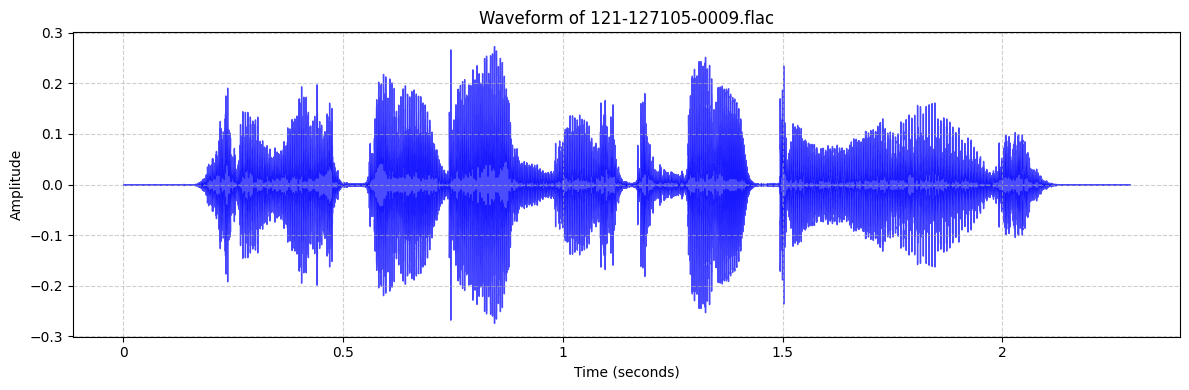

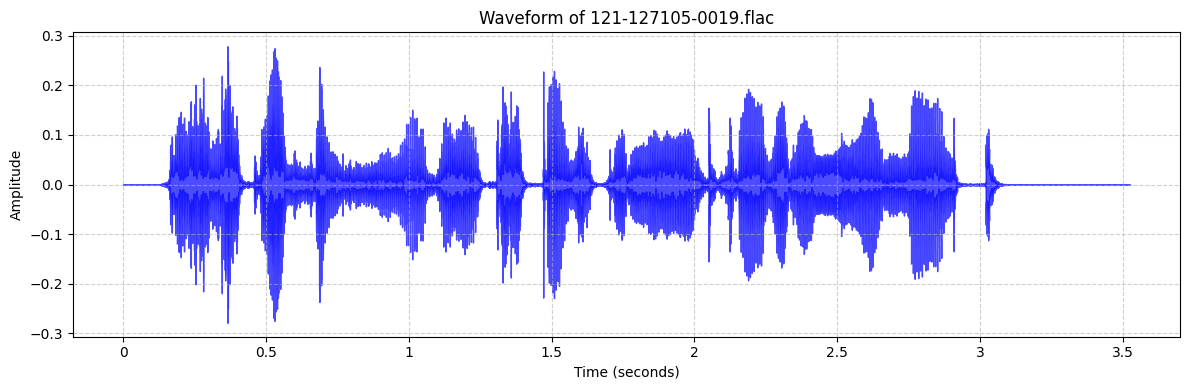

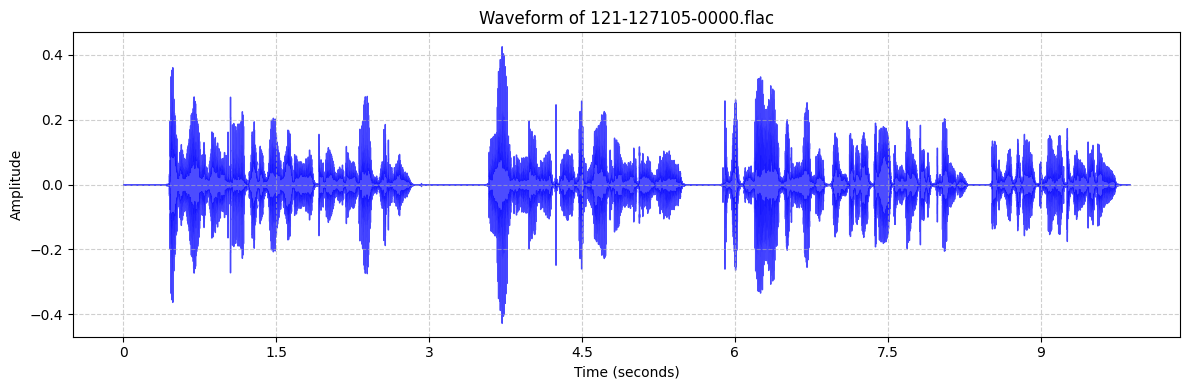

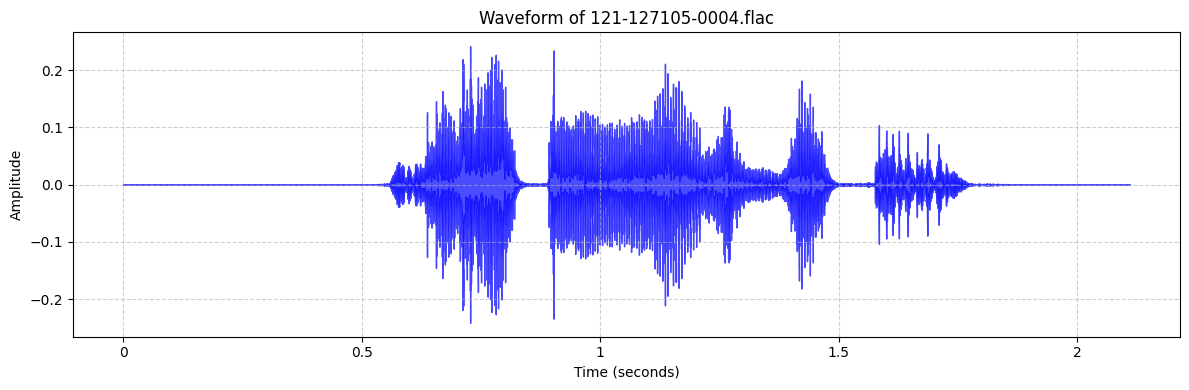

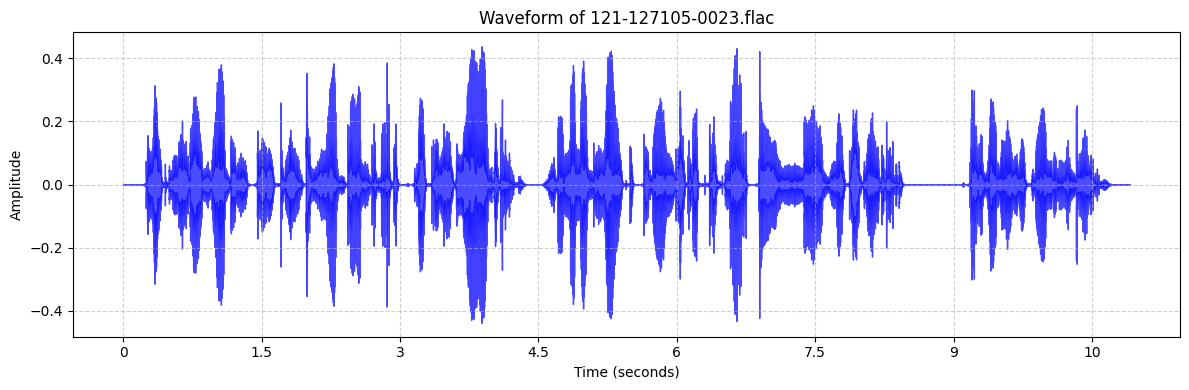

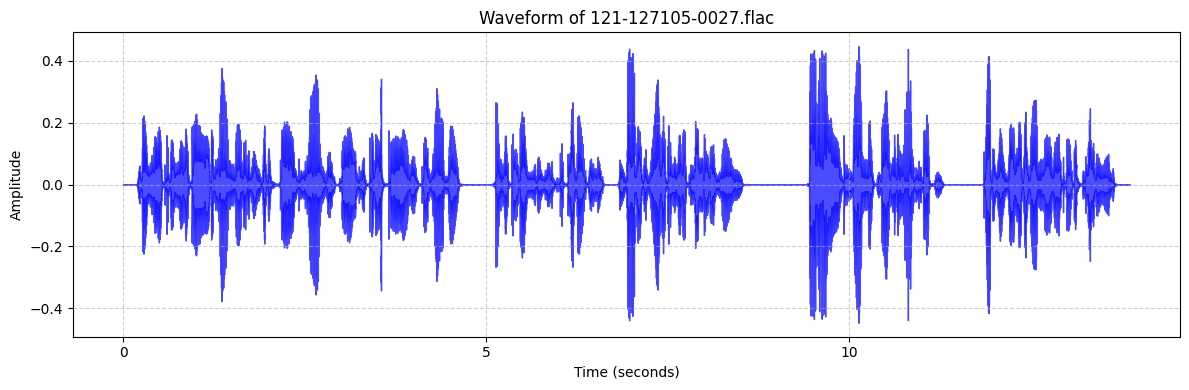

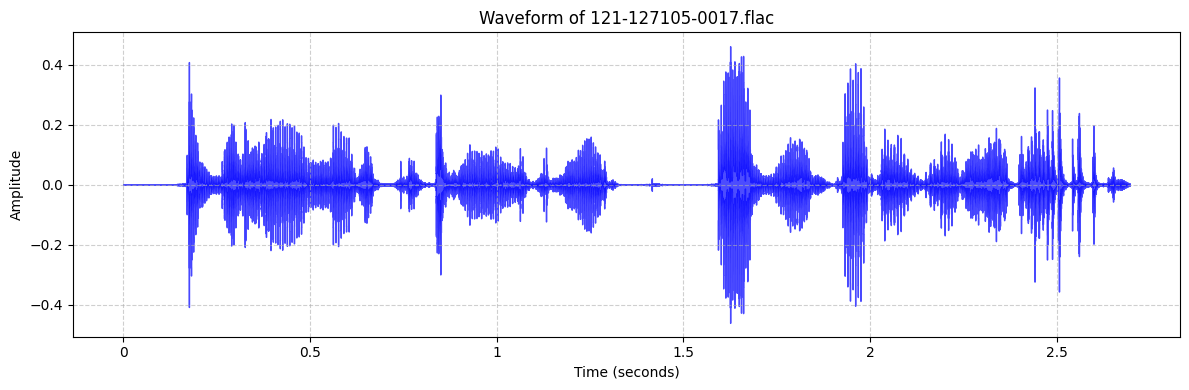

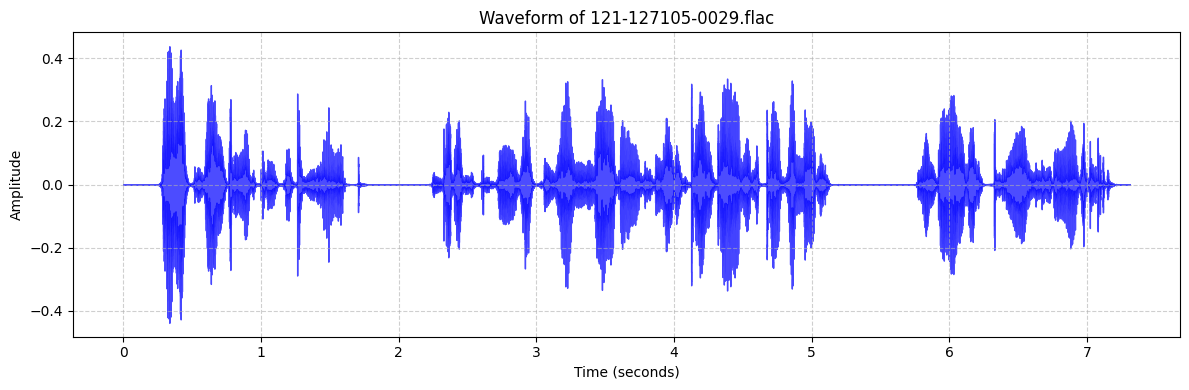

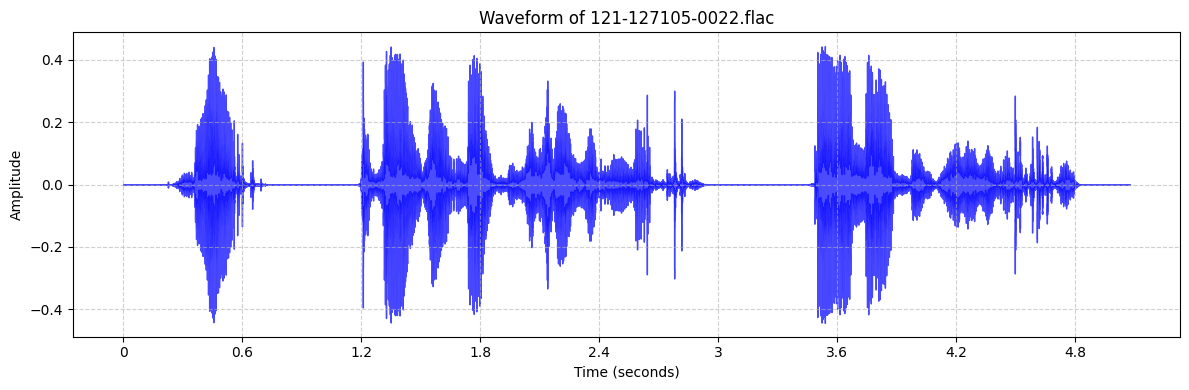

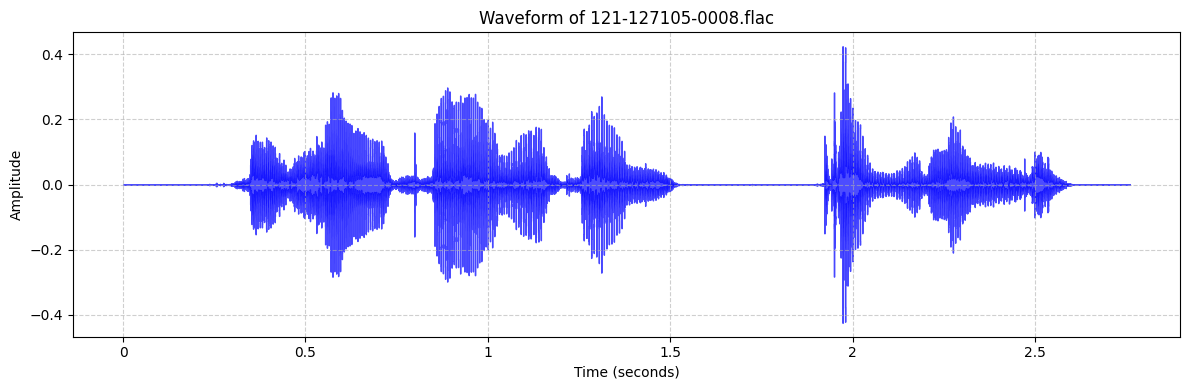

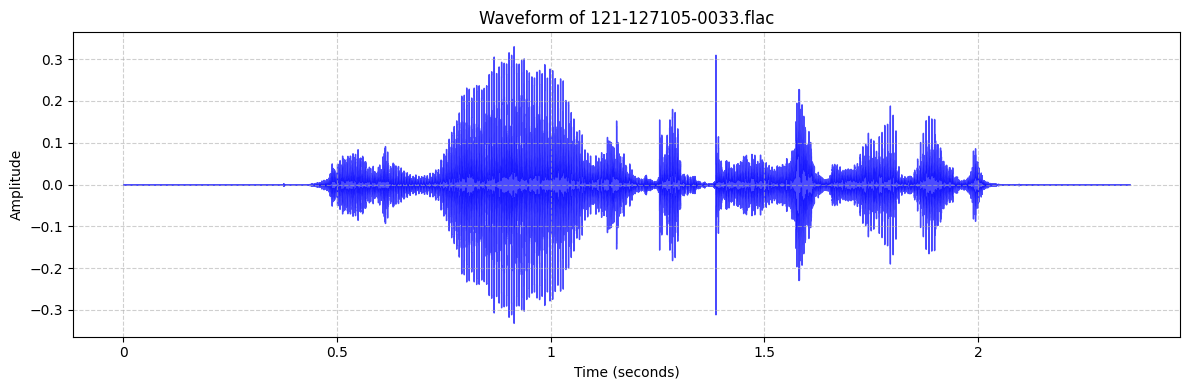

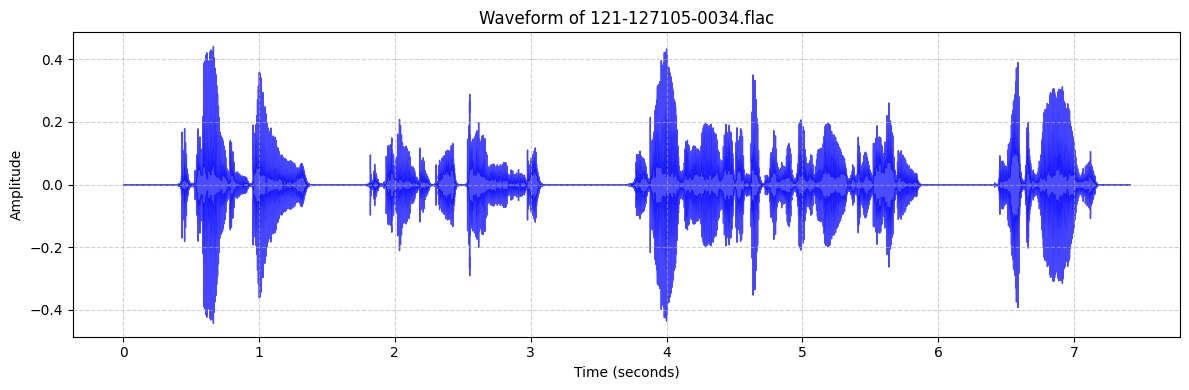

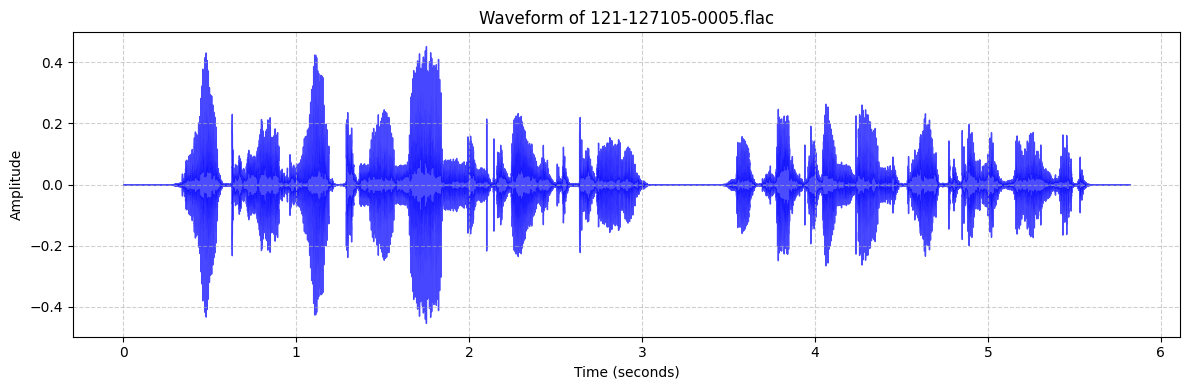

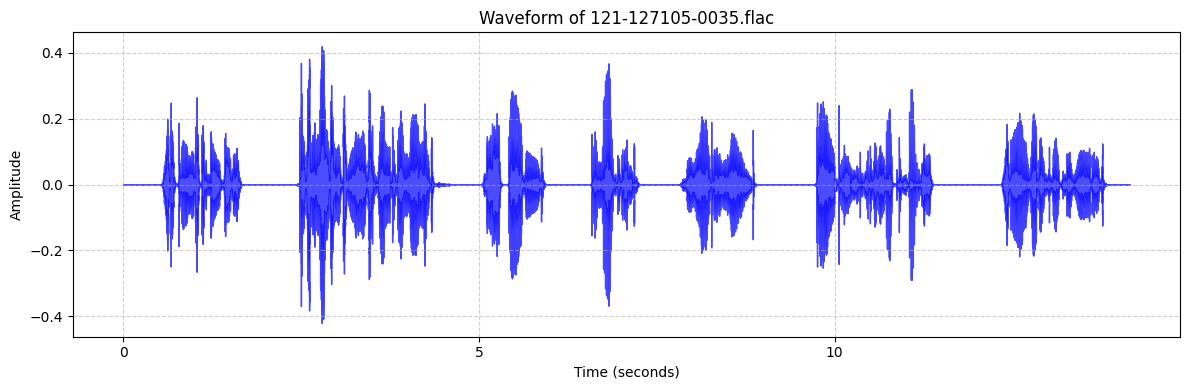

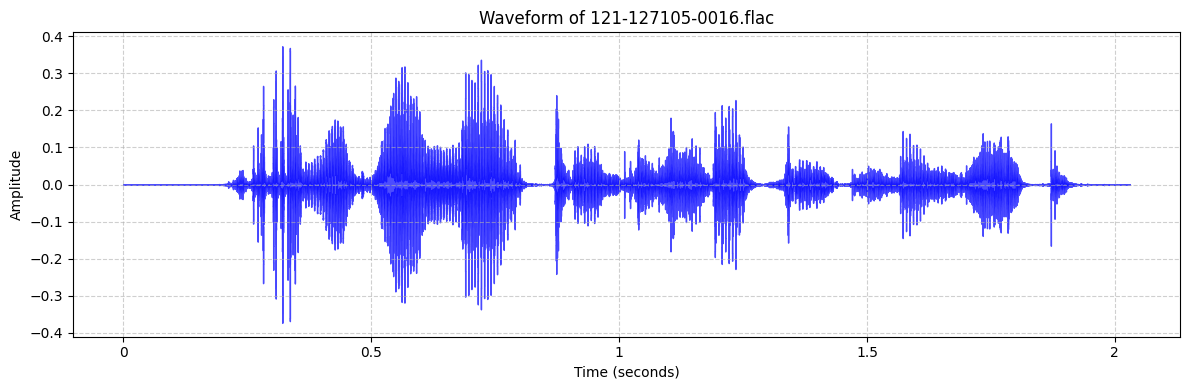

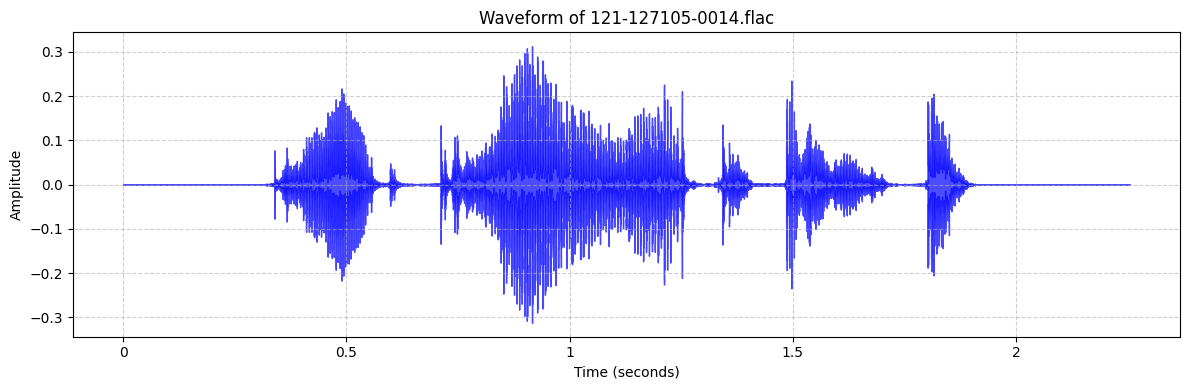

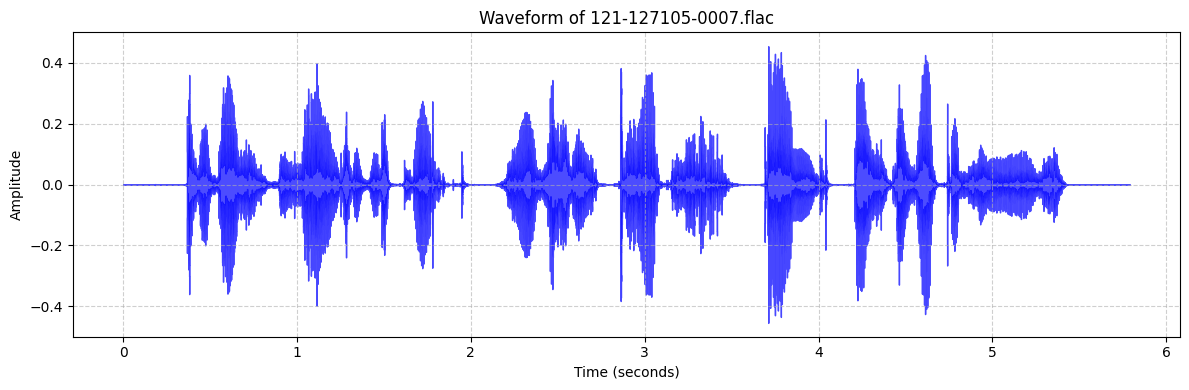

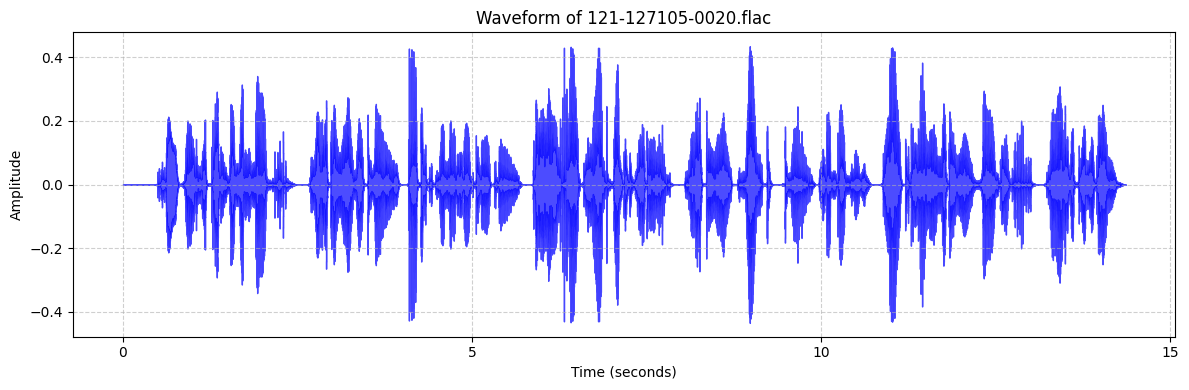

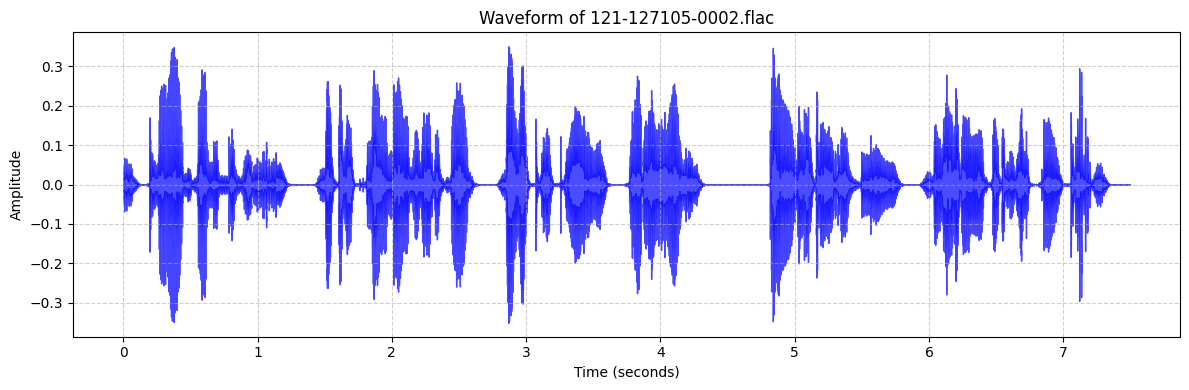

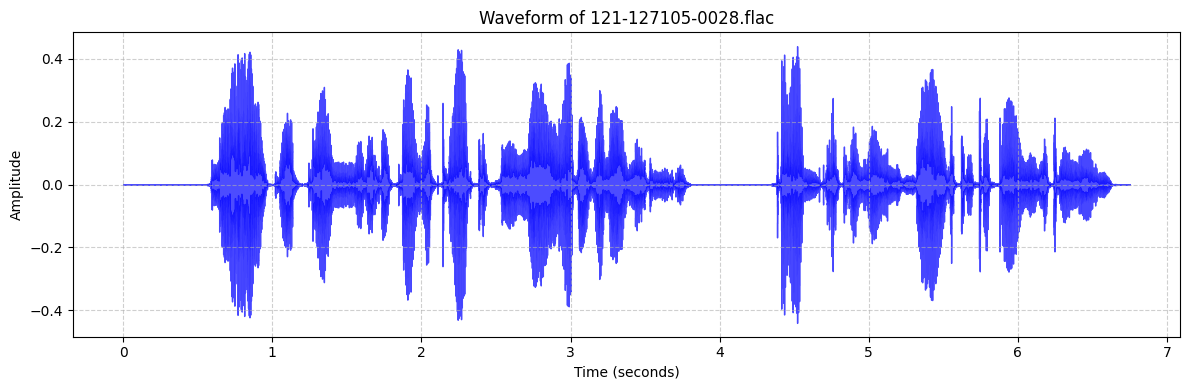

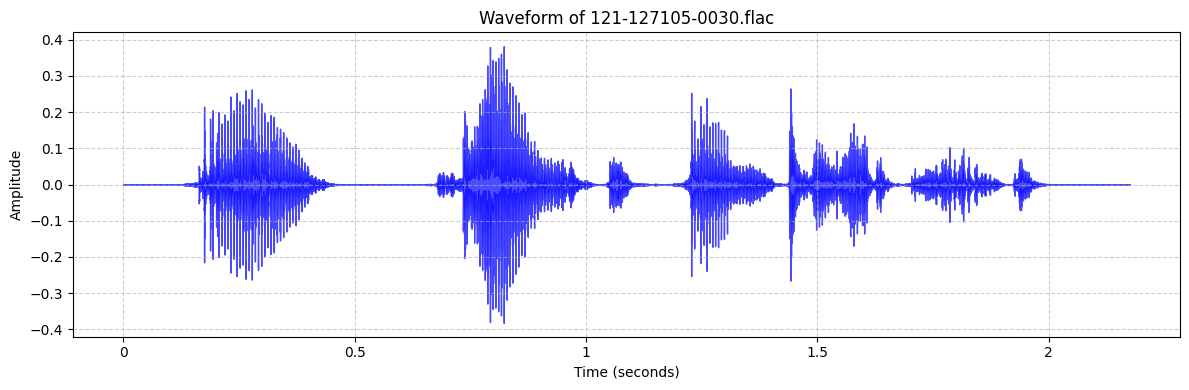

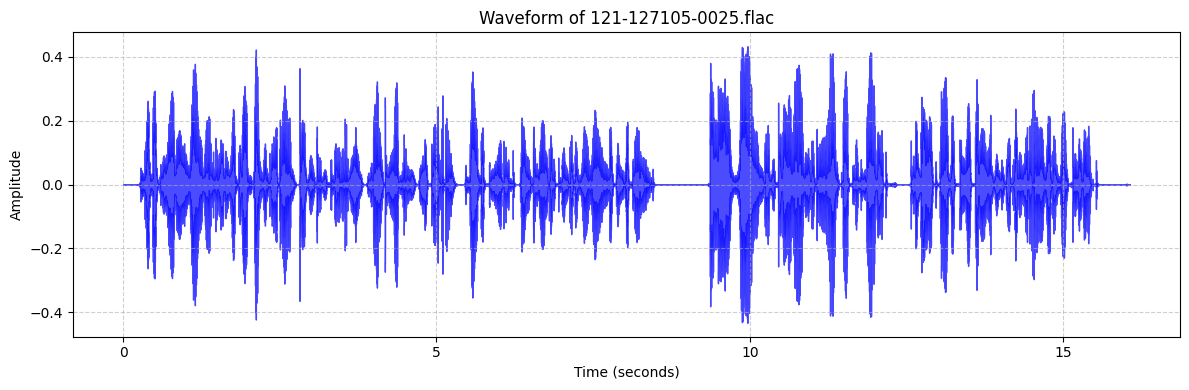

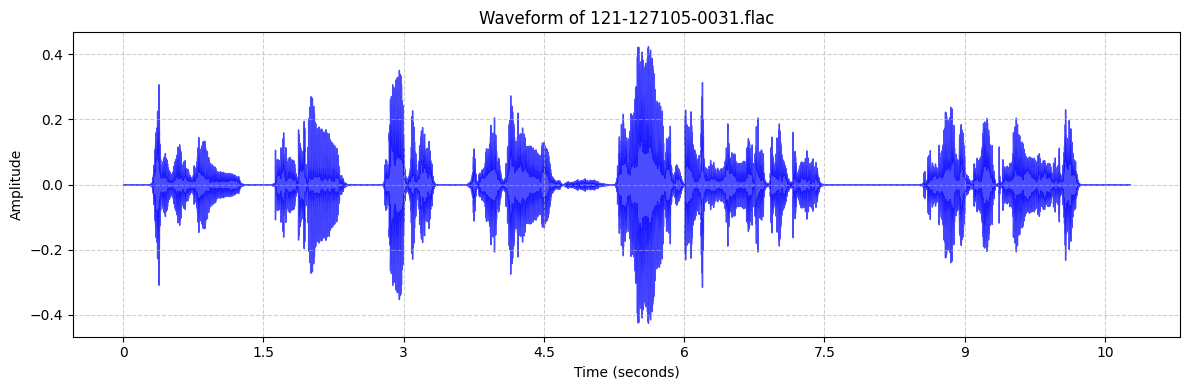

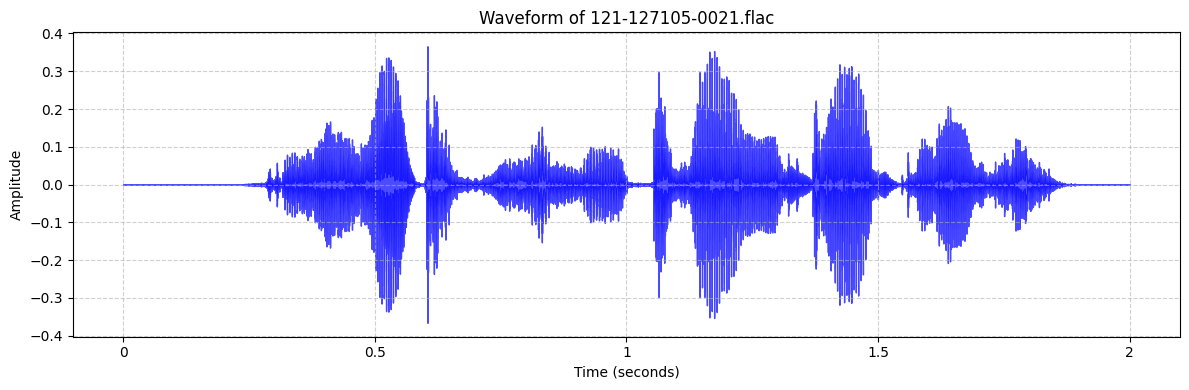

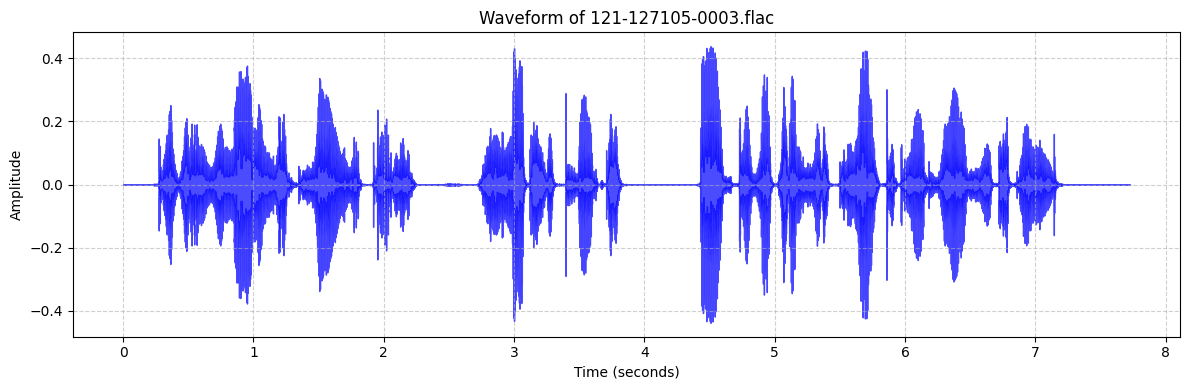

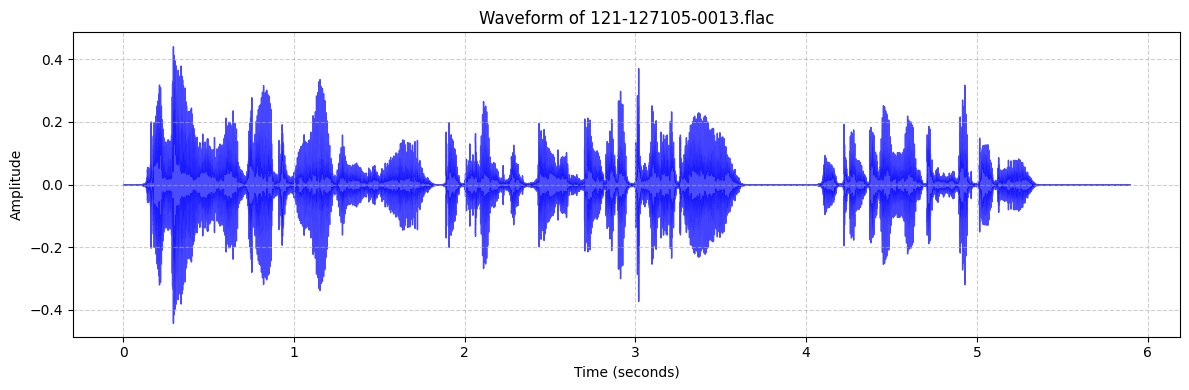

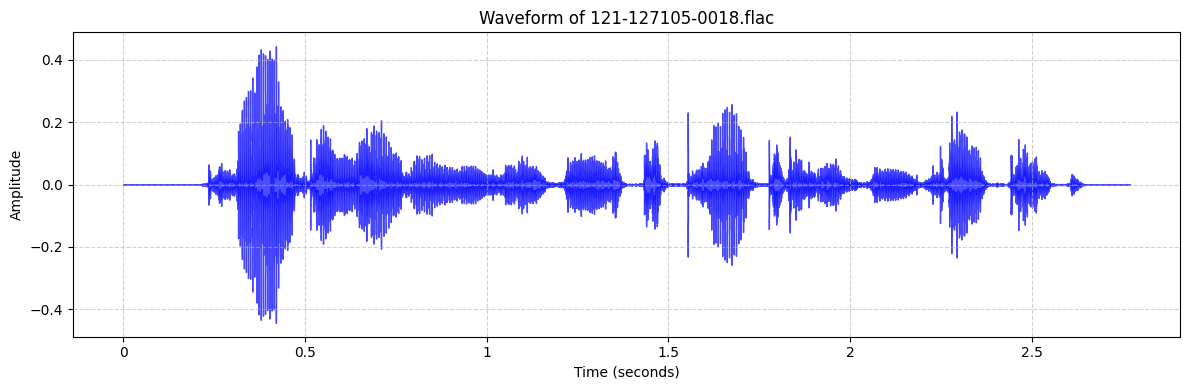

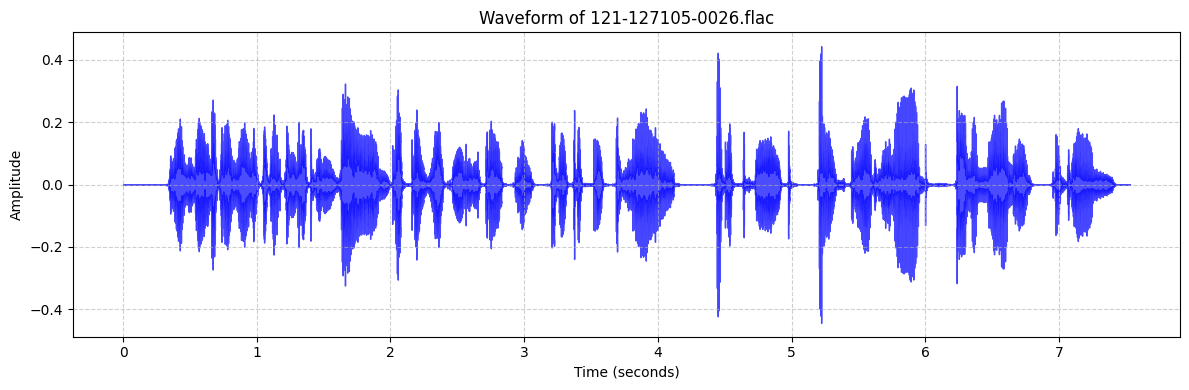

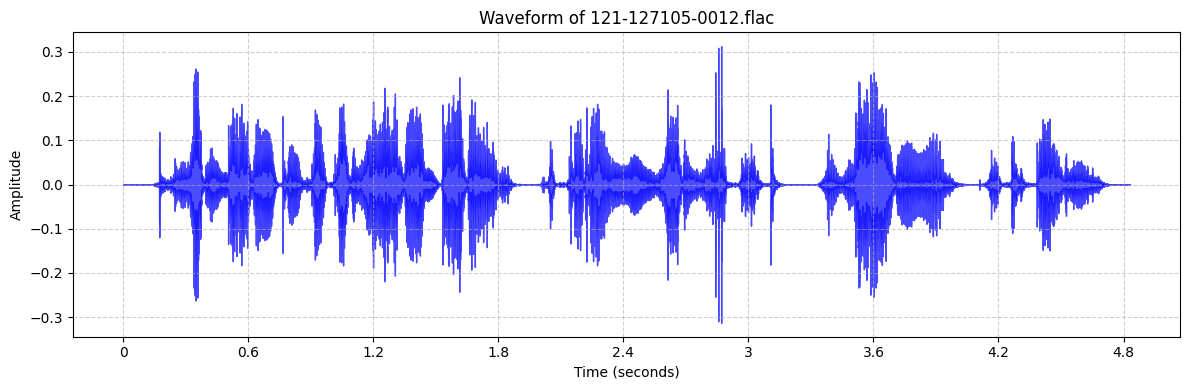

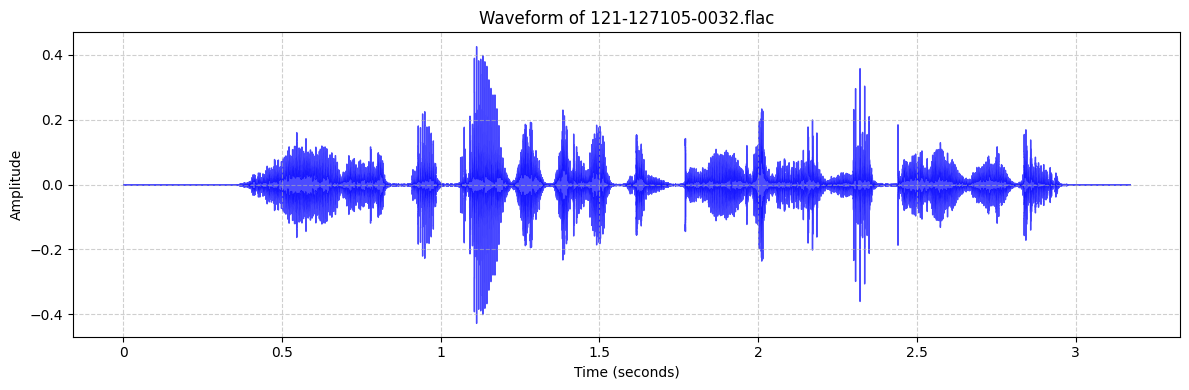

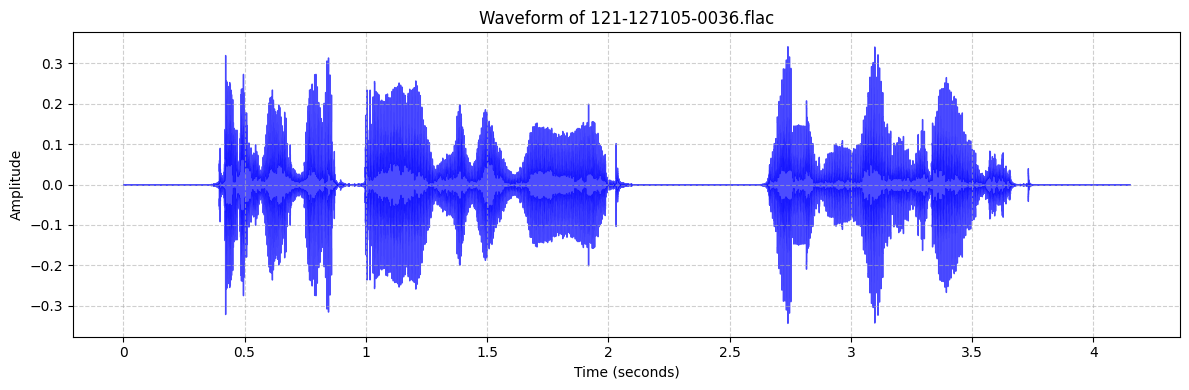

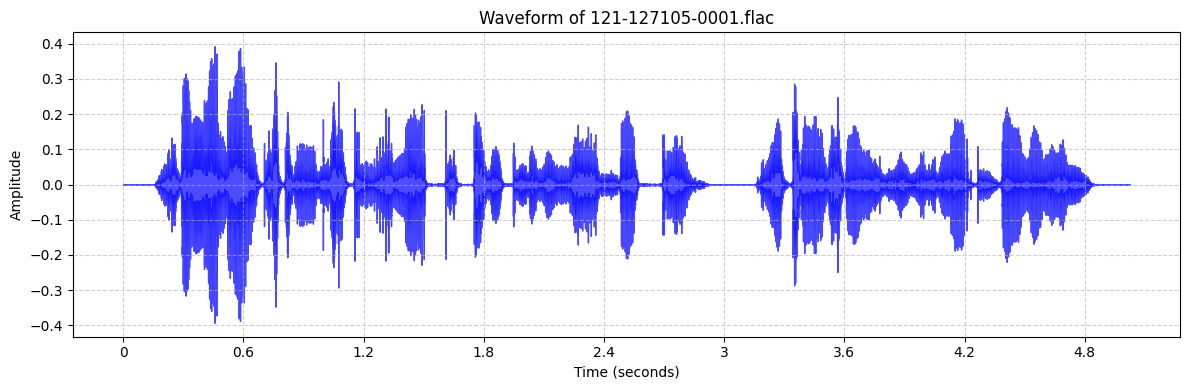

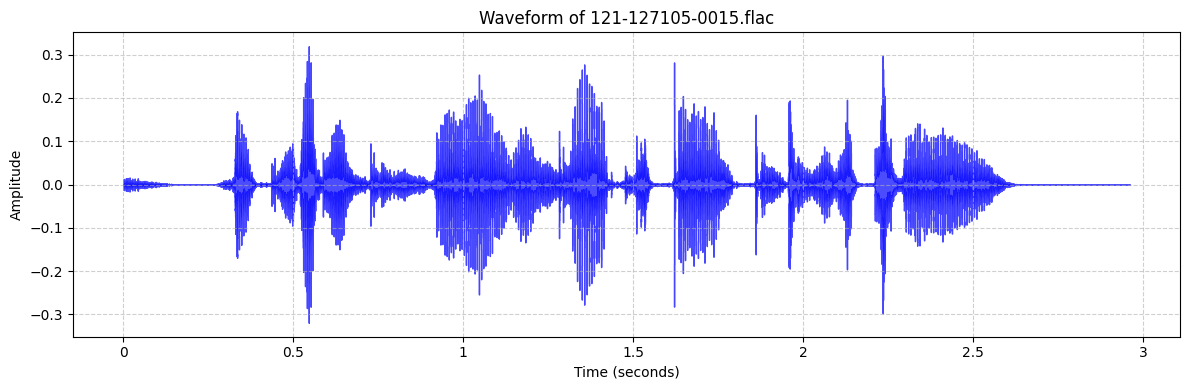

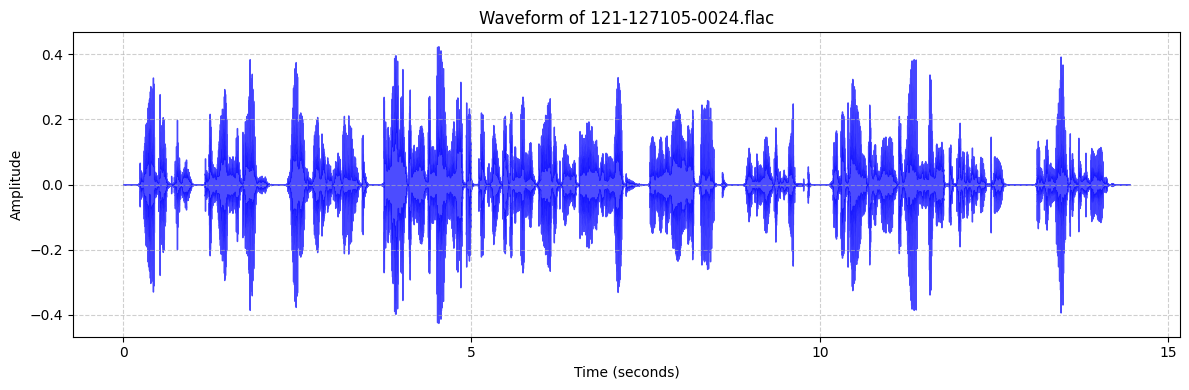

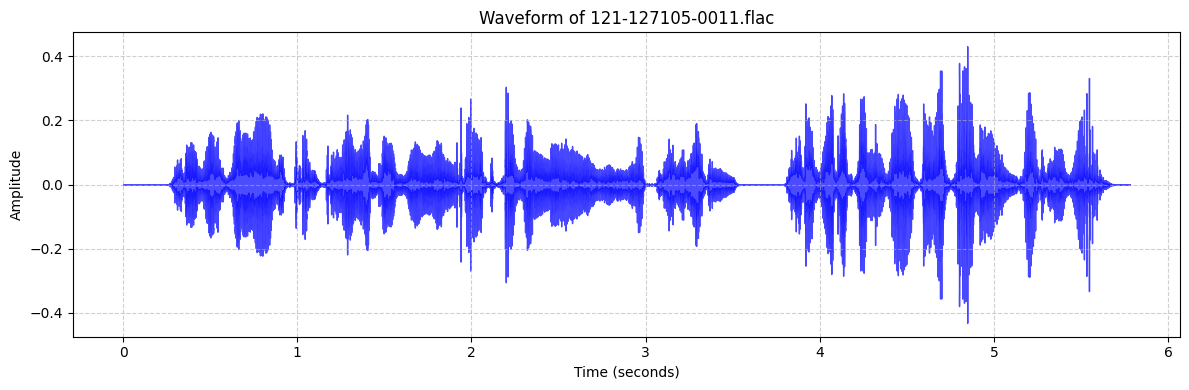

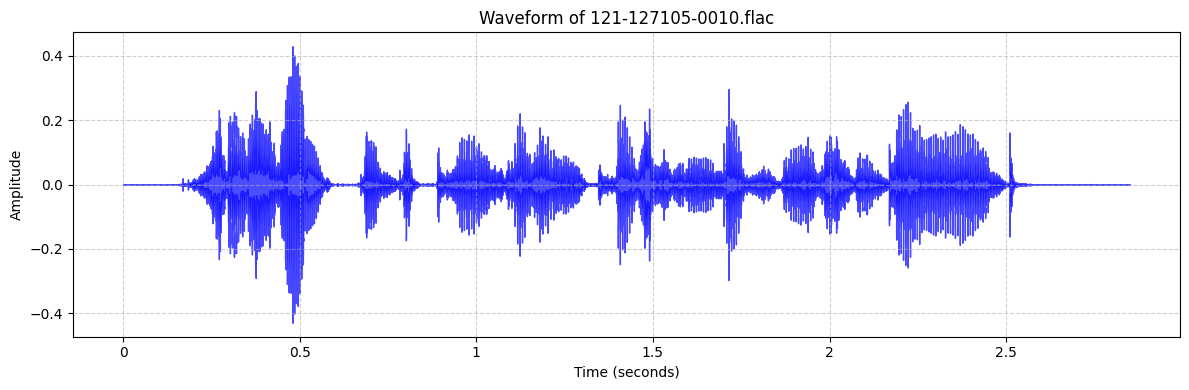

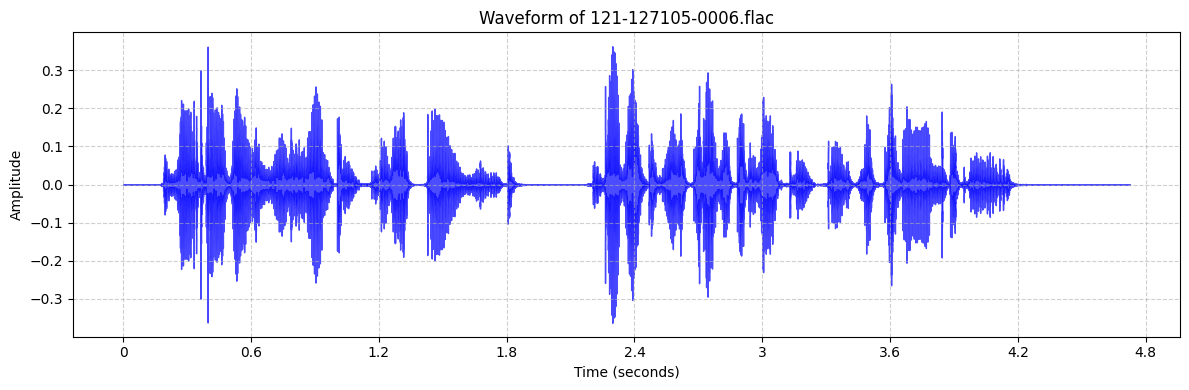

In [13]:
if flac_files:
  for filename in audio_files:
        full_path = os.path.join(unzipped_dir, filename)

        try:
            audio_data, sr = librosa.load(full_path, sr=None, duration=30.0)

            if audio_data.ndim > 1:
                audio_data = audio_data[0, :]


            # Create the plot
            plt.figure(figsize=(12, 4))
            librosa.display.waveshow(y=audio_data, sr=sr, x_axis='time', color='blue', alpha=0.7)

            # Add titles and labels
            plt.title(f'Waveform of {filename}')
            plt.xlabel('Time (seconds)')
            plt.ylabel('Amplitude')
            plt.grid(True, linestyle='--', alpha=0.6)

            # Show the plot
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error plotting {filename}: {e}")

# **Step 2: Text Preprocessing**

**Question 2:** Create a pipeline to clean texts. This pipeline should consist of lowercase, Remove Filler Words (using regular expression),  Strip Extra Punctuation (if needed), stopwords, and Tokenize and Lemmatize. Be sure  to use SpaCy for answering this question.
*   If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?

*   How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?

For every question, be sure to anlayze and discuss your response.

Creating a pipeline for cleaning texts

Importing necessary libraries

In [14]:
import spacy
import re # For regular expressions
import string # To get common punctuation characters

In [15]:
# Set up SpaCy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md # Using medium model for better accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 9.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# Load the spaCy English language model
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("SpaCy 'en_core_web_md' model not found. Downloading it...")
    !python -m spacy download en_core_web_md
    nlp = spacy.load("en_core_web_md")

print("SpaCy model loaded successfully.")

SpaCy model loaded successfully.


In [17]:
# --- Define Filler Words ---
# Using a set for faster lookup
FILLER_WORDS = set([
    "um", "uh", "like", "you know", "i mean", "so", "right",
    "okay", "yeah", "well", "actually", "basically", "literally",
    "seriously", "anyway", "sort of", "kind of", "just", "really", "oh",
    "well", "yes"
])

In [20]:
import pandas as pd
# --- Define the Cleaning Pipeline Function ---
def clean_text_pipeline_revised(text: str) -> str:
    """
    Applies a revised series of cleaning steps to the input text using SpaCy.
    """
    # 1. Handle audio file IDs at the start of lines (e.g., 121-127105-0000)
    text = re.sub(r'^\d{3}-\d{6}-\d{4}\s+', '', text, flags=re.MULTILINE)
    text = text.lower() # Lowercase early for consistent regex matching

    # 2. Remove Filler Words
    filler_pattern = r'\b(?:' + '|'.join(re.escape(word) for word in FILLER_WORDS) + r')\b'
    cleaned_text = re.sub(filler_pattern, ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # 3. Process with SpaCy
    doc = nlp(cleaned_text)
    cleaned_tokens = []

    for token in doc:
        if token.is_space: continue
        if token.is_punct: continue
        if token.is_stop: continue

        processed_token_text = token.text.strip()
        if not processed_token_text: continue
        if len(processed_token_text) == 1 and processed_token_text not in string.ascii_lowercase: continue
        if processed_token_text.isdigit(): continue
        if not re.search(r'[a-zA-Z]', processed_token_text): continue

        cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)


transcripts_dir = "/content/unzipped_audio_data/127105"

# List to store data for the minimalist DataFrame
data_for_minimal_df = []

# --- Transcript File Processing Loop ---
transcript_files = [
    f for f in os.listdir(transcripts_dir)
    if f.lower().endswith('.txt') and not f.lower().endswith('.trans.txt') and not f.startswith('._') # Added condition
]

if not transcript_files:
    print(f"No .txt files found in '{transcripts_dir}'. Please ensure your transcripts are there.")
    print(f"Files found in directory: {os.listdir(transcripts_dir)}")
else:
    print(f"Found {len(transcript_files)} transcript files to clean and store.")
    for filename in transcript_files:
        full_raw_transcript_path = os.path.join(transcripts_dir, filename)
        transcript_id = os.path.splitext(filename)[0]

        print(f"\n--- Processing Transcript: {filename} ---")

        raw_transcript_content = ""
        cleaned_transcript_content = ""

        try:
            # 1. Read the raw transcript content
            with open(full_raw_transcript_path, 'r', encoding='utf-8') as f:
                raw_transcript_content = f.read().strip()
            print("Raw transcript loaded.")

            # 2. Clean the transcript using your pipeline
            print("Cleaning transcript...")
            cleaned_transcript_content = clean_text_pipeline_revised(raw_transcript_content)
            print("Cleaning complete.")

            # 3. Add data to the list for the minimalist DataFrame
            data_for_minimal_df.append({
                "transcript_id": transcript_id,
                "cleaned_text": cleaned_transcript_content,
                "raw_transcript": raw_transcript_content,
            })

        except FileNotFoundError:
            print(f"Error: Transcript file not found at {full_raw_transcript_path}. Skipping.")
        except Exception as e:
            print(f"An error occurred while processing '{filename}': {e}. Skipping this file.")
            data_for_minimal_df.append({
                "transcript_id": transcript_id,
                "cleaned_text": "",
                "raw_transcript": ""
            })

# --- Create and Save the Minimal DataFrame ---
if data_for_minimal_df:
    df_cleaned_texts = pd.DataFrame(data_for_minimal_df)
    csv_output_path = os.path.join(transcripts_dir, "cleaned_transcripts_minimal.csv")
    df_cleaned_texts.to_csv(csv_output_path, index=False, encoding="utf-8")
    print(f"\nMinimal DataFrame with cleaned texts saved to: {csv_output_path}")

    # Display the first few rows of the DataFrame
    print("\n--- Minimal DataFrame Head ---")
    print(df_cleaned_texts.head())

    # Display info to check data types and non-null counts
    print("\n--- DataFrame Info ---")
    df_cleaned_texts.info()

else:
    print("\nNo transcripts were processed to create a DataFrame.")

Found 37 transcript files to clean and store.

--- Processing Transcript: 121-127105-0004.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0029.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0008.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0031.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0027.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0030.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0018.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Transcript: 121-127105-0020.txt ---
Raw transcript loaded.
Cleaning transcript...
Cleaning complete.

--- Processing Tr

If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?


In my pipeline, misrecognized or misspelled words are not addressed beyond basic cleaning steps like lowercasing, punctuation removal, stopword removal, and lemmatization. The token.is_alpha filter helps ensure tokens are word-like, but it doesn't correct spelling.

Spell-checking or correction could be integrated into the pipeline. This would involve:

Post-Lemmatization Correction: Applying a spell-checking library like pyspellchecker or TextBlob after tokenization and lemmatization. This allows correction on the base form of the word.
Contextual Correction: For more advanced correction, especially of misrecognized words by ASR (which might be phonetically similar but spelled differently), more sophisticated models that understand sentence context like n-gram models, transformer-based models would be needed.

How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?

For multilingual or code-switched transcripts, the preprocessing pipeline would primarily need the following aspects. Language Detection which is identify the language of each text segment using langdetect or fastText. Language-Specific Processing where we route each segment to the appropriate spaCy language model for tokenization, stopword removal and lemmatization
We should also Expand the Filler Word Lists to include filler words from all relevant languages.
We need to incorporate fallback by addressing short, highly mixed, or unidentifiable segments with a general tokenizer or by skipping specific filters.
This would create a branching pipeline that adapts to the language of each text portion.

**Question 3:** Using EDA techniques, answer the following questions:

*   **Basic EDA**
1.   Visualize the top 20 most frequent words in the transcriptions. What do you observe?
2.   Are there words that appear only once (hapax legomena)? What might they indicate?

*   **Audio-Specific EDA**
1.   Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?
2.   Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?
3. Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

BASIC EDA

Visualizing the top 20 most frequent words in the transcriptions

<ipython-input-21-95f2d4e75f57>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


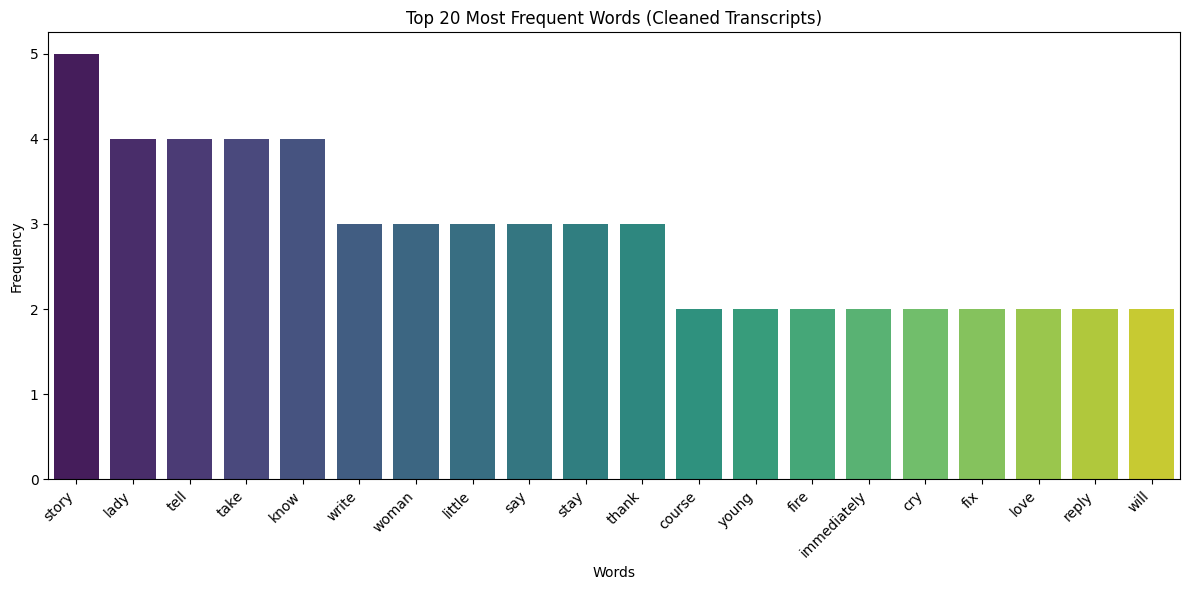

<ipython-input-21-95f2d4e75f57>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


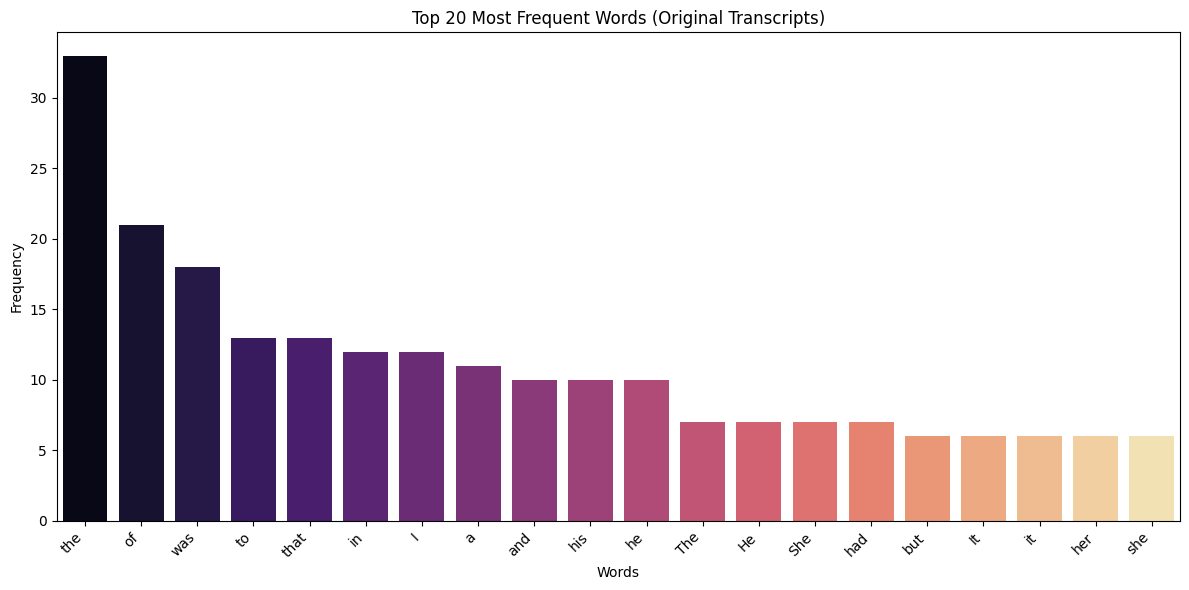

In [21]:
import os
import pandas as pd
import spacy
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper function to get top N words ---
def get_top_n_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# --- Visualize Top 20 Most Frequent Words from Cleaned Transcripts ---
if 'df_cleaned_texts' in locals() and not df_cleaned_texts.empty:
    top_cleaned_words = get_top_n_words(df_cleaned_texts['cleaned_text'])

    if top_cleaned_words:
        words, counts = zip(*top_cleaned_words)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(words), y=list(counts), palette='viridis')
        plt.title('Top 20 Most Frequent Words (Cleaned Transcripts)')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No cleaned words found for visualization.")

    # --- Visualize Top 20 Most Frequent Words from Original Transcripts ---
    top_raw_words = get_top_n_words(df_cleaned_texts['raw_transcript'])

    if top_raw_words:
        words, counts = zip(*top_raw_words)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(words), y=list(counts), palette='magma')
        plt.title('Top 20 Most Frequent Words (Original Transcripts)')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No raw words found for visualization.")
else:
    print("df_cleaned_texts DataFrame is not available or is empty. Cannot visualize.")


This bar chart, "Top 20 Most Frequent Words," shows "story" as the most common word at a frequency of 5. Close behind, "lady," "tell," "take," and "know" all hit 4. After that, words like "write," "woman," and "thank" appear 3 times, while the remaining words like "course," "cry," and "will" show up twice. It looks like a typical pattern: a few words pop up a lot, and then the frequency gradually drops off.

Are there words that appear only once (hapax legomena)? What might they indicate?

In [22]:
# --- Code to identify Hapax Legomena ---
if 'df_cleaned_texts' in locals() and not df_cleaned_texts.empty:
    # Concatenate all cleaned text into a single string
    all_cleaned_text = ' '.join(df_cleaned_texts['cleaned_text']).strip()

    # Tokenize the entire cleaned corpus
    all_words = all_cleaned_text.split()

    if all_words:
        # Count word frequencies
        word_counts = Counter(all_words)

        # Identify hapax legomena (words appearing only once)
        hapax_legomena = [word for word, count in word_counts.items() if count == 1]

        print(f"\nTotal unique words in cleaned transcripts: {len(word_counts)}")
        print(f"Number of hapax legomena (words appearing only once): {len(hapax_legomena)}")

        if hapax_legomena:
            print("\nSample of Hapax Legomena (first 20 if more exist):")
            for i, word in enumerate(hapax_legomena[:20]):
                print(f"- {word}")
            if len(hapax_legomena) > 20:
                print(f"...and {len(hapax_legomena) - 20} more.")
        else:
            print("No hapax legomena found in the cleaned transcripts.")
    else:
        print("No words found in the cleaned transcripts after processing. Cannot identify hapax legomena.")
else:
    print("df_cleaned_texts DataFrame is not available or is empty. Cannot identify hapax legomena.")



Total unique words in cleaned transcripts: 186
Number of hapax legomena (words appearing only once): 152

Sample of Hapax Legomena (first 20 if more exist):
- plenty
- people
- help
- governess
- supreme
- authority
- hang
- untried
- nervous
- vision
- duty
- company
- great
- loneliness
- town
- residence
- big
- house
- fill
- spoil
...and 132 more.


The cleaned transcripts show a high number of hapax legomena (152 of 186 unique words), meaning many words appear only once. This high proportion suggests that speakers used a diverse vocabulary with infrequent repetition and the dataset consists of short audio segments, limiting word recurrence opportunities. Some unique terms may also be topic-specific or proper nouns. While residual ASR errors are a possibility, the extensive cleaning makes this less likely than natural linguistic diversity within brief recordings.

AUDIO SPECIFIC EDA

Audio file loaded: /content/unzipped_audio_data/127105/121-127105-0001.flac
Sample rate: 22050 Hz
Audio duration: 5.03 seconds


<ipython-input-23-1c9f8971b719>:17: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=y, sr=sr, x_axis='time')


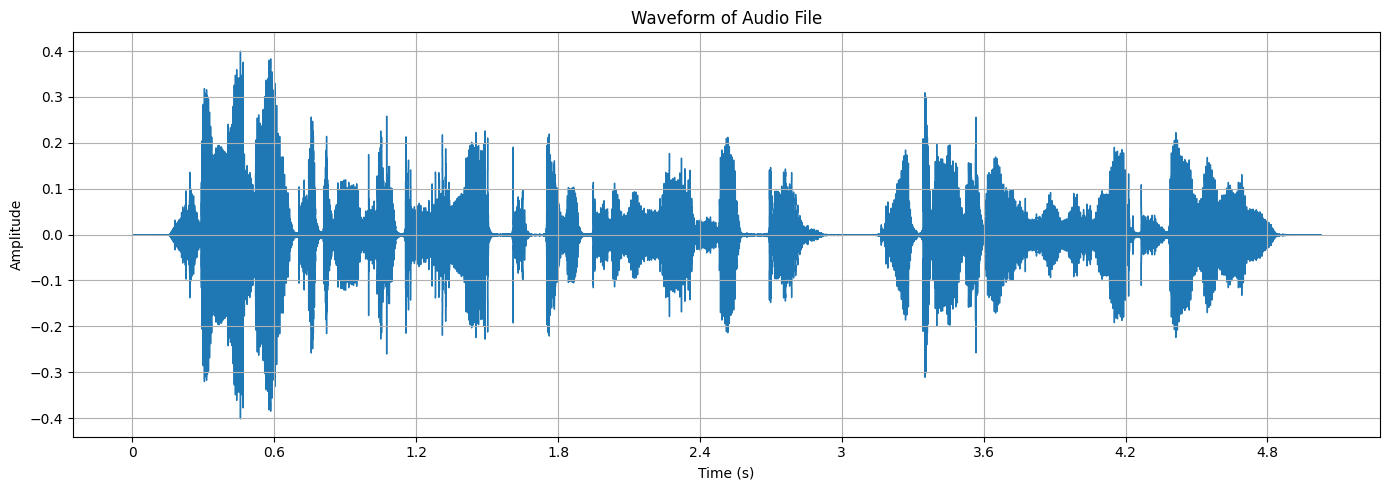

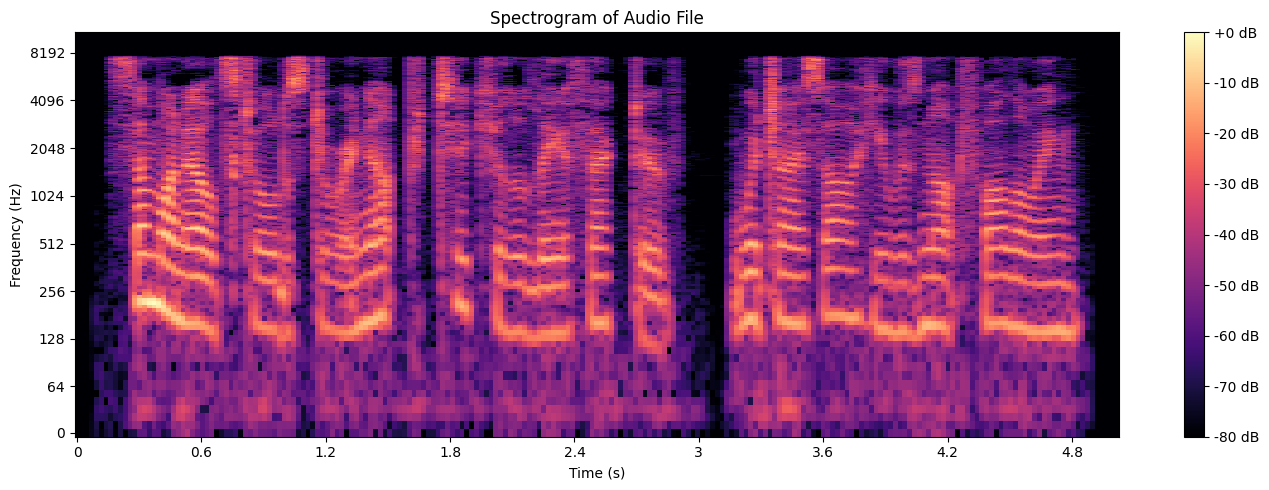

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_file_path = "/content/unzipped_audio_data/127105/121-127105-0001.flac"

# --- Load Audio File ---
try:
    y, sr = librosa.load(audio_file_path)
    print(f"Audio file loaded: {audio_file_path}")
    print(f"Sample rate: {sr} Hz")
    print(f"Audio duration: {len(y)/sr:.2f} seconds")

    # --- Plot Waveform ---
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y=y, sr=sr, x_axis='time')
    plt.title('Waveform of Audio File')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Plot Spectrogram ---
    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of Audio File')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: Audio file not found at '{audio_file_path}'. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

Obsrevation from the spectogram:
1. Intensity:
The audio energy is highest (brightest yellow) in the lower frequency ranges, showing louder sounds there. Intensity varies significantly over time, reflecting changes in loudness, with darker areas representing quieter periods or silence.
2. Frequency Distribution: Most energy is concentrated below 2000 Hz, especially below 1000 Hz, which is common in human speech. Higher frequencies show less intensity. The visible horizontal lines in the lower frequencies confirm speech presence.

Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?


There is a significant variation in speaking speed among the audio files. The speeds range from approximately 1.33 words/second (121-127105-0014.flac) to 4.35 words/second (121-127105-0012.flac).
The average speaking speed is around 2.82 words/second. While there are some slower and faster outliers, a majority of the files show speaking speeds clustered between 2.5 and 3.5 words/second, showing a relatively consistent pace for most of the audio.

In [24]:
import os
import librosa
import re

unzipped_dir = "/content/unzipped_audio_data/127105"


audio_files = [f for f in os.listdir(unzipped_dir) if f.lower().endswith(('.mp3', '.wav', '.flac', '.m4a'))]

if not audio_files:
    print(f"No audio files found in {unzipped_dir} with expected extensions (.mp3, .wav, .flac, .m4a).")
    print(f"Files found in directory: {os.listdir(unzipped_dir)}")
else:
    print(f"Found {len(audio_files)} audio files for speed analysis.")
    speaking_speed_data = []

    for audio_file_name in audio_files:
        audio_file_path = os.path.join(unzipped_dir, audio_file_name)
        transcript_file_name = os.path.splitext(audio_file_name)[0] + ".txt"
        transcript_file_path = os.path.join(unzipped_dir, transcript_file_name)

        print(f"\n--- Analyzing: {audio_file_name} ---")

        try:
            # Get audio duration
            audio_duration = librosa.get_duration(path=audio_file_path)
            print(f"Audio duration: {audio_duration:.2f} seconds")

            # Read transcript and count words
            if os.path.exists(transcript_file_path):
                with open(transcript_file_path, 'r', encoding='utf-8') as f:
                    transcript_content = f.read()

                # Simple word count: split by whitespace and filter out empty strings
                words = re.findall(r'\b\w+\b', transcript_content.lower()) # Use regex to find words (alphanumeric sequences)
                word_count = len(words)
                print(f"Word count in transcript: {word_count} words")

                # 3. Calculate words per second
                if audio_duration > 0:
                    words_per_second = word_count / audio_duration
                    print(f"Speaking speed: {words_per_second:.2f} words/second")
                    speaking_speed_data.append({
                        "audio_file": audio_file_name,
                        "duration_seconds": audio_duration,
                        "word_count": word_count,
                        "words_per_second": words_per_second
                    })
                else:
                    print("Audio duration is zero, cannot calculate words per second.")
            else:
                print(f"Transcript file not found for {audio_file_name} at {transcript_file_path}. Skipping.")

        except FileNotFoundError:
            print(f"Error: Audio file not found at {audio_file_path}. Skipping.")
        except Exception as e:
            print(f"An error occurred while processing {audio_file_name}: {e}. Skipping this file.")

    if speaking_speed_data:
        print("\n--- Speaking Speed Summary ---")
        for data in speaking_speed_data:
            print(f"File: {data['audio_file']}, Speed: {data['words_per_second']:.2f} words/second")

    else:
        print("\nNo speaking speed data could be calculated.")

Found 37 audio files for speed analysis.

--- Analyzing: 121-127105-0009.flac ---
Audio duration: 2.29 seconds
Word count in transcript: 7 words
Speaking speed: 3.06 words/second

--- Analyzing: 121-127105-0019.flac ---
Audio duration: 3.52 seconds
Word count in transcript: 11 words
Speaking speed: 3.12 words/second

--- Analyzing: 121-127105-0000.flac ---
Audio duration: 9.88 seconds
Word count in transcript: 27 words
Speaking speed: 2.73 words/second

--- Analyzing: 121-127105-0004.flac ---
Audio duration: 2.11 seconds
Word count in transcript: 4 words
Speaking speed: 1.90 words/second

--- Analyzing: 121-127105-0023.flac ---
Audio duration: 10.91 seconds
Word count in transcript: 29 words
Speaking speed: 2.66 words/second

--- Analyzing: 121-127105-0027.flac ---
Audio duration: 13.87 seconds
Word count in transcript: 42 words
Speaking speed: 3.03 words/second

--- Analyzing: 121-127105-0017.flac ---
Audio duration: 2.69 seconds
Word count in transcript: 10 words
Speaking speed: 3.71

Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.


--- Analyzing Filler Words ---

Top 10 Filler Words/Disfluencies in Raw Transcripts:
- 'just': 2 occurrences
- 'oh': 2 occurrences
- 'so': 2 occurrences
- 'well': 1 occurrences


<ipython-input-25-47ff9c2d9910>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Filler Word', data=filler_words_plot_data, palette='coolwarm')


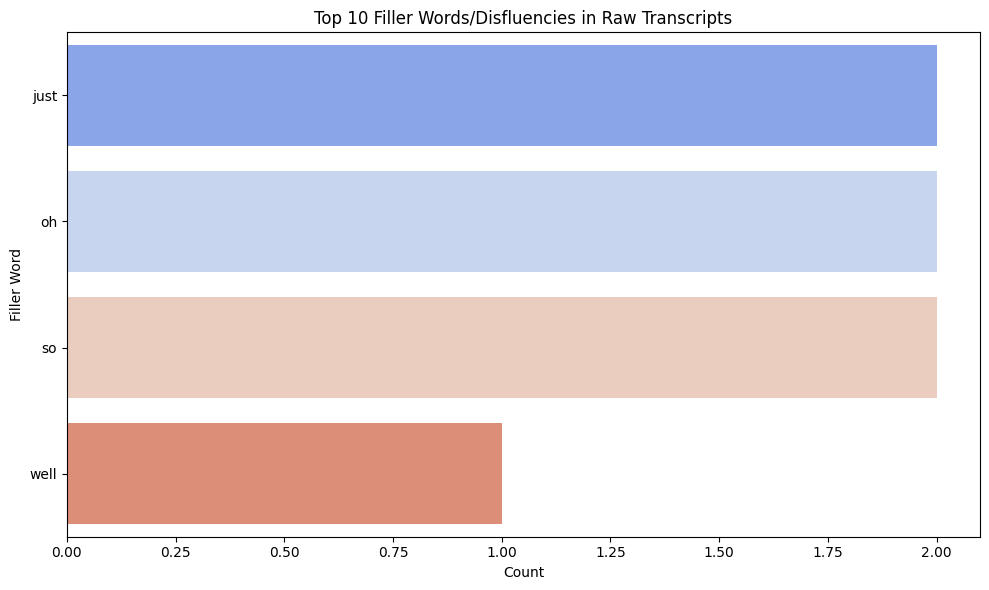


Filler Words/Disfluencies in Cleaned Transcripts (expected to be few or none due to cleaning pipeline):
No defined filler words found in cleaned transcripts. This indicates the cleaning pipeline was effective in removing them.


In [25]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define Filler Words (from user's previous code) ---
FILLER_WORDS = set([
    "um", "uh", "like", "you know", "i mean", "so", "right",
    "okay", "yeah", "oh", "well", "actually", "just"
])


print("\n--- Analyzing Filler Words ---")

if 'df_cleaned_texts' in locals() and not df_cleaned_texts.empty:
    # Analyze Raw Transcripts for Filler Words
    all_raw_text = ' '.join(df_cleaned_texts['raw_transcript']).lower()
    raw_filler_counts = Counter()

    for filler in FILLER_WORDS:
        # Use regex to find whole words that exactly match the filler word, case-insensitively
        matches = re.findall(r'\b' + re.escape(filler) + r'\b', all_raw_text)
        if matches:
            raw_filler_counts[filler] = len(matches)

    print("\nTop 10 Filler Words/Disfluencies in Raw Transcripts:")
    if raw_filler_counts:
        # Sort by count in descending order
        sorted_raw_filler_counts = sorted(raw_filler_counts.items(), key=lambda item: item[1], reverse=True)
        for word, count in sorted_raw_filler_counts[:10]:
            print(f"- '{word}': {count} occurrences")
    else:
        print("No defined filler words found in raw transcripts.")

    # Visualize filler words in raw transcripts
    if raw_filler_counts:
        filler_words_plot_data = pd.DataFrame(raw_filler_counts.most_common(10), columns=['Filler Word', 'Count'])
        if not filler_words_plot_data.empty:
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Count', y='Filler Word', data=filler_words_plot_data, palette='coolwarm')
            plt.title('Top 10 Filler Words/Disfluencies in Raw Transcripts')
            plt.xlabel('Count')
            plt.ylabel('Filler Word')
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough data to visualize filler words in raw transcripts.")
    else:
        print("No filler words to visualize in raw transcripts.")

    # Analyze Cleaned Transcripts for Filler Words (expected to be none)
    all_cleaned_text = ' '.join(df_cleaned_texts['cleaned_text']).lower()
    cleaned_filler_counts = Counter()

    for filler in FILLER_WORDS:
        matches = re.findall(r'\b' + re.escape(filler) + r'\b', all_cleaned_text)
        if matches:
            cleaned_filler_counts[filler] = len(matches)

    print("\nFiller Words/Disfluencies in Cleaned Transcripts (expected to be few or none due to cleaning pipeline):")
    if cleaned_filler_counts:
        for word, count in cleaned_filler_counts.most_common(): # Show all if any exist
            print(f"- '{word}': {count} occurrences")
        print("Note: The presence of filler words in cleaned transcripts might indicate an issue with the cleaning pipeline or variations in how fillers are transcribed.")
    else:
        print("No defined filler words found in cleaned transcripts. This indicates the cleaning pipeline was effective in removing them.")

else:
    print("The DataFrame 'df_cleaned_texts' is not available or is empty.")

**Question 4:** using feature extraction technqiues:

*   **Text-Based Feature Extraction**

1.   What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.

2.   Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

*   **Audio-Based Feature Extraction**

1.   What audio features could be extracted using MFCCs?
2.   Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.

For every question, be sure to anlayze and discuss your response.

TEXT BASED FEATURE EXTRACTION

What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.


--- Feature Extraction from Cleaned Transcripts ---

1. Bag-of-Words (BoW) Feature Extraction:
Shape of BoW matrix: (37, 100) (documents x features)

First 5 rows of BoW matrix (sample):
   acute  affair  ask  attention  authority  awkward  beauty  begin  big  \
0      0       0    0          0          0        0       0      0    0   
1      0       0    0          0          1        0       0      0    0   
2      0       0    0          0          0        0       0      0    0   
3      0       0    0          0          0        0       0      0    0   
4      0       0    0          0          0        0       0      0    1   

   chair  ...  take  tell  thank  thing  touch  way  will  woman  write  young  
0      0  ...     0     0      0      0      0    0     0      0      1      0  
1      0  ...     0     0      0      0      0    0     0      0      0      1  
2      0  ...     0     0      0      0      0    0     0      1      0      0  
3      0  ...     0     0      

<ipython-input-26-9a8a701fac67>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow_word_counts.head(10).values, y=bow_word_counts.head(10).index, palette='viridis')
<ipython-input-26-9a8a701fac67>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_word_scores.head(10).values, y=tfidf_word_scores.head(10).index, palette='magma')


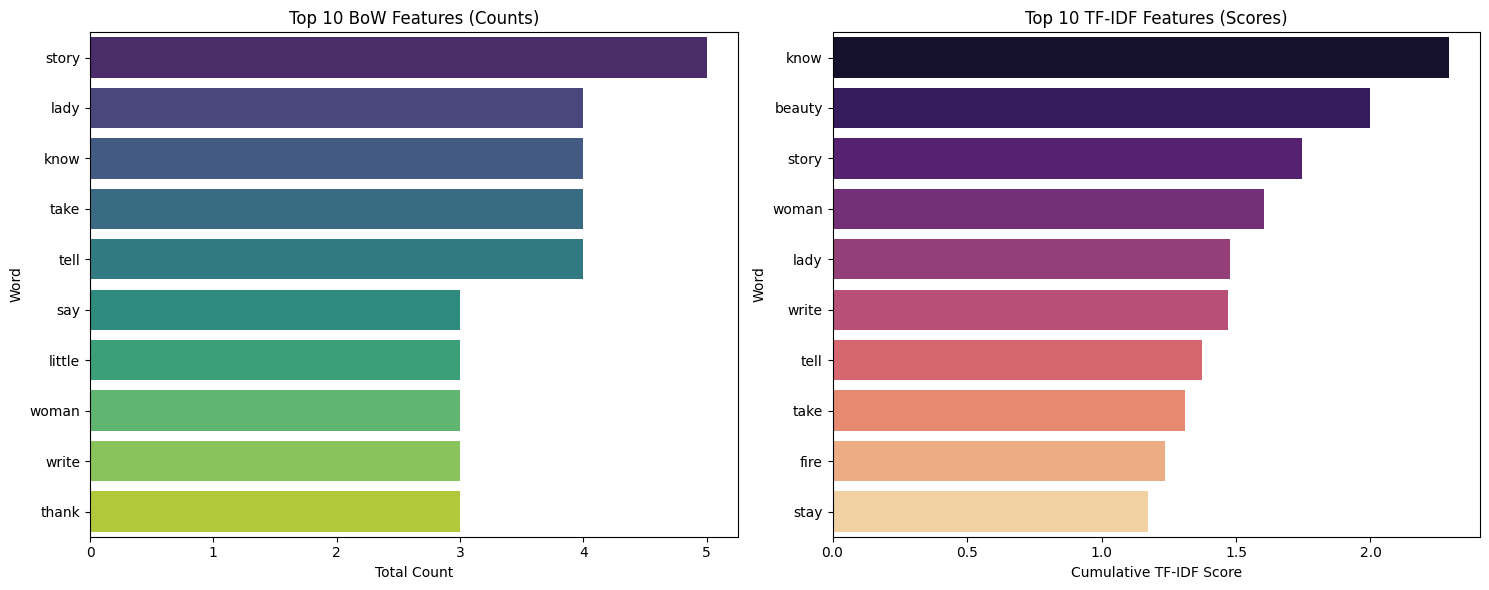

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


if 'df_cleaned_texts' not in locals() or df_cleaned_texts.empty:
    print("Error: 'df_cleaned_texts' DataFrame not found or is empty. Please ensure it's created and populated before running this code.")
else:
    cleaned_transcripts = df_cleaned_texts['cleaned_text']

    if cleaned_transcripts.empty:
        print("The 'cleaned_text' column is empty. Cannot extract features.")
    else:
        print("\n--- Feature Extraction from Cleaned Transcripts ---")

        # 1: Bag-of-Words (BoW)
        print("\n1. Bag-of-Words (BoW) Feature Extraction:")

        bow_vectorizer = CountVectorizer(max_features=100)
        bow_matrix = bow_vectorizer.fit_transform(cleaned_transcripts)
        bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

        print(f"Shape of BoW matrix: {bow_df.shape} (documents x features)")
        print("\nFirst 5 rows of BoW matrix (sample):")
        print(bow_df.head())

        bow_word_counts = bow_df.sum(axis=0).sort_values(ascending=False)
        print("\nTop 10 words by raw count (BoW):")
        print(bow_word_counts.head(10))

        # 2: TF-IDF (Term Frequency-Inverse Document Frequency)
        print("\n2. TF-IDF Feature Extraction:")
        tfidf_vectorizer = TfidfVectorizer(max_features=100) # Using same max_features for comparison
        tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_transcripts)
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

        print(f"Shape of TF-IDF matrix: {tfidf_df.shape} (documents x features)")
        print("\nFirst 5 rows of TF-IDF matrix (sample):")
        print(tfidf_df.head())


        tfidf_word_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)
        print("\nTop 10 words by cumulative TF-IDF score:")
        print(tfidf_word_scores.head(10))

        #Visualize top words from both for comparison
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        sns.barplot(x=bow_word_counts.head(10).values, y=bow_word_counts.head(10).index, palette='viridis')
        plt.title('Top 10 BoW Features (Counts)')
        plt.xlabel('Total Count')
        plt.ylabel('Word')

        plt.subplot(1, 2, 2)
        sns.barplot(x=tfidf_word_scores.head(10).values, y=tfidf_word_scores.head(10).index, palette='magma')
        plt.title('Top 10 TF-IDF Features (Scores)')
        plt.xlabel('Cumulative TF-IDF Score')
        plt.ylabel('Word')

        plt.tight_layout()
        plt.show()

Comparison of BoW vs. TF-IDF

BoW gives raw frequencies of words. A word that appears 5 times has a count of 5.
TF-IDF gives scores that reflect how important a word is to a document in a collection.
It down-weights common words (like 'the', 'a', 'is' if not removed as stop words) and
up-weights words unique or specific to a document.

Difference in 'Top 10 words':
BoW often highlights overall most frequent words.
TF-IDF often highlights words that are more distinctive to the content of the documents.

Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

In [27]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned_texts['cleaned_text'].astype(str))
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tfidf)

print("\n--- Identifying Characteristic Keywords per Transcript (using TF-IDF) ---")

if 'df_tfidf' in locals() and not df_tfidf.empty and 'df_cleaned_texts' in locals() and not df_cleaned_texts.empty:
    num_keywords_to_show = 5 # Number of top keywords to display for each transcript

    if 'transcript_id' not in df_cleaned_texts.columns:
        df_cleaned_texts['transcript_id'] = [f"doc_{i}" for i in range(len(df_cleaned_texts))]
        print("Warning: 'transcript_id' column not found in df_cleaned_texts. Using generic IDs.")

    # Get the feature names (words) that correspond to the columns in df_tfidf
    feature_names_tfidf = df_tfidf.columns.tolist()

    for i, row in df_tfidf.iterrows():
        transcript_id = df_cleaned_texts.loc[i, 'transcript_id']

        # Get the TF-IDF scores for the current transcript
        tfidf_scores = row.values

        # Get the indices that would sort the scores in descending order
        sorted_indices = np.argsort(tfidf_scores)[::-1]

        # Get the top N keywords and their scores
        top_keywords = []
        for idx in sorted_indices:
            if tfidf_scores[idx] > 0: # Only consider words with a non-zero TF-IDF score
                top_keywords.append((feature_names_tfidf[idx], tfidf_scores[idx]))
            if len(top_keywords) >= num_keywords_to_show:
                break

        print(f"\nTranscript ID: {transcript_id}")
        if top_keywords:
            print("  Top Keywords:")
            for keyword, score in top_keywords:
                print(f"    - {keyword} (TF-IDF: {score:.4f})")
        else:
            print("  No significant keywords found for this transcript.")

else:
    print("Cannot identify keywords as 'df_tfidf' or 'df_cleaned_texts' DataFrames are not available or are empty. Please ensure the previous steps to create these are run successfully.")


--- Identifying Characteristic Keywords per Transcript (using TF-IDF) ---

Transcript ID: 121-127105-0004
  Top Keywords:
    - write (TF-IDF: 0.7071)
    - story (TF-IDF: 0.7071)

Transcript ID: 121-127105-0029
  Top Keywords:
    - supreme (TF-IDF: 0.3492)
    - plenty (TF-IDF: 0.3492)
    - people (TF-IDF: 0.3492)
    - governess (TF-IDF: 0.3492)
    - help (TF-IDF: 0.3492)

Transcript ID: 121-127105-0008
  Top Keywords:
    - hang (TF-IDF: 0.7716)
    - woman (TF-IDF: 0.6360)

Transcript ID: 121-127105-0031
  Top Keywords:
    - vision (TF-IDF: 0.3433)
    - untried (TF-IDF: 0.3433)
    - nervous (TF-IDF: 0.3433)
    - great (TF-IDF: 0.3433)
    - duty (TF-IDF: 0.3433)

Transcript ID: 121-127105-0027
  Top Keywords:
    - trophy (TF-IDF: 0.2439)
    - town (TF-IDF: 0.2439)
    - wish (TF-IDF: 0.2439)
    - travel (TF-IDF: 0.2439)
    - spoil (TF-IDF: 0.2439)

Transcript ID: 121-127105-0030
  Top Keywords:
    - anticipate (TF-IDF: 1.0000)

Transcript ID: 121-127105-0018
  Top Keyw

Analysis:

The above output shows keywords that are most characteristic of *each individual transcript* based on their TF-IDF scores.
To identify keywords characteristic of specific **speakers** or broader **topics**, we would need to do the following:
1.  **For Speakers:** Add a 'speaker_id' column to your df_cleaned_texts, then group transcripts by speaker, concatenate their cleaned texts, and re-run TF-IDF on these 'speaker documents'.
2.  **For Topics:** Perform topic modeling (e.g., Latent Dirichlet Allocation - LDA) on your TF-IDF matrix to discover underlying topics and the words associated with them.

AUDIO BASED FEATURE EXTRACTION

What audio features could be extracted using MFCCs?


MFCCs (Mel-Frequency Cepstral Coefficients) are a type of audio feature capturing the spectral envelope of sound. Other common audio features extracted alongside MFCCs include:

Spectral Centroid: Brightness of sound.

Zero-Crossing Rate (ZCR): Rate of signal sign changes (e.g., voice vs. unvoiced).

Chroma Features: Pitch class information.

Spectral Rolloff/Bandwidth: Spectral shape.

Root Mean Square (RMS) Energy: Loudness.



In [28]:
import os
import librosa
import numpy as np
import pandas as pd

unzipped_dir = "/content/unzipped_audio_data/127105"

# List all audio files in the directory
audio_files = [f for f in os.listdir(unzipped_dir) if f.lower().endswith(('.mp3', '.wav', '.flac', '.m4a'))]

if not audio_files:
    print(f"No audio files found in {unzipped_dir} with expected extensions (.mp3, .wav, .flac, .m4a).")
    print(f"Files found in directory: {os.listdir(unzipped_dir)}")
else:
    print(f"Found {len(audio_files)} audio files for feature extraction.")
    all_audio_features = []

    for audio_file_name in audio_files:
        audio_file_path = os.path.join(unzipped_dir, audio_file_name)
        file_id = os.path.splitext(audio_file_name)[0]

        print(f"\n--- Extracting features from: {audio_file_name} ---")

        try:
            # Load the audio file
            y, sr = librosa.load(audio_file_path, sr=None) # sr=None preserves original sampling rate

            # Extract MFCCs (Mel-Frequency Cepstral Coefficients)
            # n_mfcc specifies the number of coefficients to return
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            # Take the mean of MFCCs over time to get a single vector per file
            mfccs_mean = np.mean(mfccs, axis=1)

            # Extract other common audio features:
            # Spectral Centroid
            cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            cent_mean = np.mean(cent)

            # Zero-Crossing Rate
            zcr = librosa.feature.zero_crossing_rate(y=y)
            zcr_mean = np.mean(zcr)

            # Chroma Feature (measures harmonic content)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            chroma_mean = np.mean(chroma, axis=1)

            # Spectral Rolloff
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            rolloff_mean = np.mean(rolloff)

            # Spectral Bandwidth
            bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            bandwidth_mean = np.mean(bandwidth)

            # Store extracted features
            features_dict = {f'mfcc_{i+1}': mfccs_mean[i] for i in range(len(mfccs_mean))}
            features_dict['spectral_centroid'] = cent_mean
            features_dict['zero_crossing_rate'] = zcr_mean
            features_dict['spectral_rolloff'] = rolloff_mean
            features_dict['spectral_bandwidth'] = bandwidth_mean
            # Add mean of chroma features
            for i in range(len(chroma_mean)):
                features_dict[f'chroma_{i+1}'] = chroma_mean[i]

            features_dict['audio_file_id'] = file_id
            all_audio_features.append(features_dict)

        except FileNotFoundError:
            print(f"Error: Audio file not found at {audio_file_path}. Skipping.")
        except Exception as e:
            print(f"An error occurred while processing {audio_file_name}: {e}. Skipping this file.")

    if all_audio_features:
        # Create a Pandas DataFrame from the extracted features
        df_audio_features = pd.DataFrame(all_audio_features)

        # Set 'audio_file_id' as the index for easier lookup
        df_audio_features.set_index('audio_file_id', inplace=True)

        print("\n--- Audio Features DataFrame Head ---")
        print(df_audio_features.head())
        print(f"\nShape of Audio Features DataFrame: {df_audio_features.shape}")
        print("\nThis DataFrame now contains the extracted numerical features for each of the audio files.")
    else:
        print("\nNo audio features could be extracted.")

Found 37 audio files for feature extraction.

--- Extracting features from: 121-127105-0009.flac ---

--- Extracting features from: 121-127105-0019.flac ---

--- Extracting features from: 121-127105-0000.flac ---

--- Extracting features from: 121-127105-0004.flac ---

--- Extracting features from: 121-127105-0023.flac ---

--- Extracting features from: 121-127105-0027.flac ---

--- Extracting features from: 121-127105-0017.flac ---

--- Extracting features from: 121-127105-0029.flac ---

--- Extracting features from: 121-127105-0022.flac ---

--- Extracting features from: 121-127105-0008.flac ---

--- Extracting features from: 121-127105-0033.flac ---

--- Extracting features from: 121-127105-0034.flac ---

--- Extracting features from: 121-127105-0005.flac ---

--- Extracting features from: 121-127105-0035.flac ---

--- Extracting features from: 121-127105-0016.flac ---

--- Extracting features from: 121-127105-0014.flac ---

--- Extracting features from: 121-127105-0007.flac ---

--


--- Visualizing Audio Features ---

Plotting distributions of selected audio features...


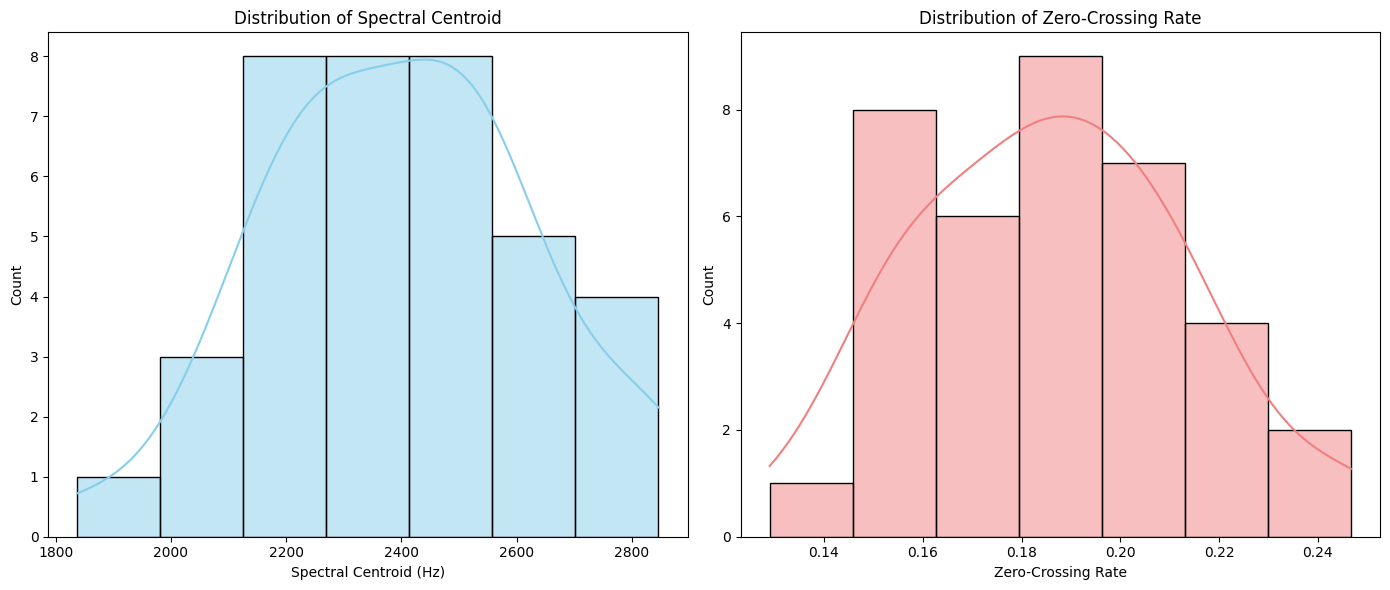


Performing PCA for dimensionality reduction and plotting...
Explained variance ratio by principal components: [0.22824207 0.19432516]
Total explained variance by 2 components: 0.42


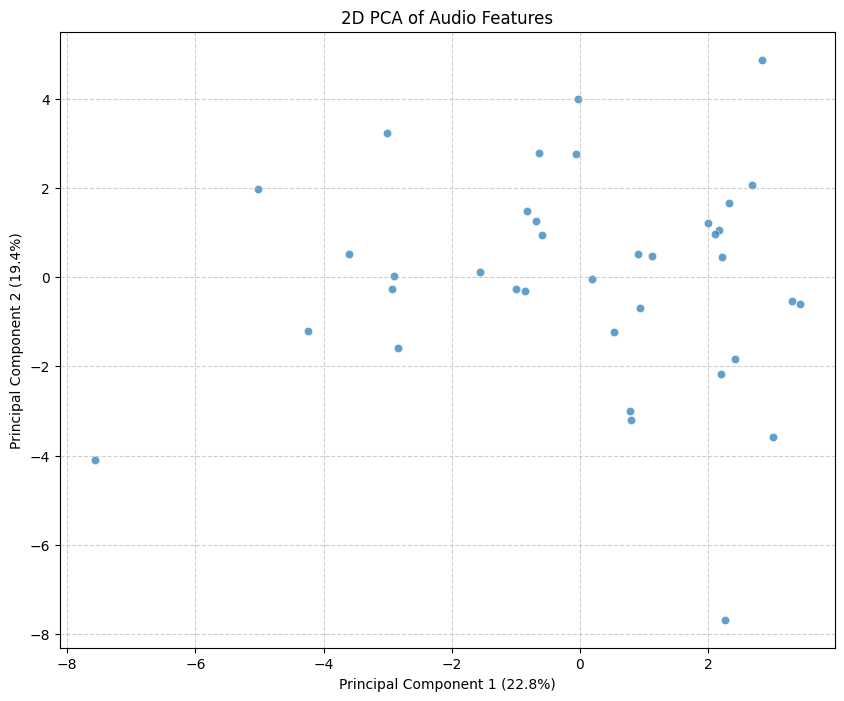


**Interpretation of PCA Plot:**
Each point in the scatter plot represents an audio file. Files that are closer together in this 2D space are more similar in terms of their extracted audio features.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("\n--- Visualizing Audio Features ---")

if 'df_audio_features' in locals() and not df_audio_features.empty:
    # Distribution Plots for Key Features ---
    print("\nPlotting distributions of selected audio features...")

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df_audio_features['spectral_centroid'], kde=True, color='skyblue')
    plt.title('Distribution of Spectral Centroid')
    plt.xlabel('Spectral Centroid (Hz)')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df_audio_features['zero_crossing_rate'], kde=True, color='lightcoral')
    plt.title('Distribution of Zero-Crossing Rate')
    plt.xlabel('Zero-Crossing Rate')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    # Dimensionality Reduction with PCA and Scatter Plot ---
    print("\nPerforming PCA for dimensionality reduction and plotting...")

    # Exclude non-numeric columns if any (like 'audio_file_id' if it's not the index)
    features_for_pca = df_audio_features.select_dtypes(include=[np.number])

    if features_for_pca.empty:
        print("No numeric features found for PCA after excluding non-numeric columns.")
    else:
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_for_pca)

        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_features)

        # Create a DataFrame for the principal components
        df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'], index=df_audio_features.index)

        print(f"Explained variance ratio by principal components: {pca.explained_variance_ratio_}")
        print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.2f}")

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_pca, alpha=0.7)
        plt.title('2D PCA of Audio Features')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        print("\n**Interpretation of PCA Plot:**")
        print("Each point in the scatter plot represents an audio file. Files that are closer together in this 2D space are more similar in terms of their extracted audio features.")

else:
    print("The 'df_audio_features' DataFrame is not available or is empty. Please ensure the audio feature extraction code has run successfully and generated this DataFrame.")

Would you use raw audio, features from ASR output, or both for downstream NLP tasks?

The choice depends on the NLP task's needs:

Raw Audio (or its features like MFCCs): Use when prosody, emotion, or speaker characteristics are vital (e.g., emotion recognition, speaker identification). It contains non-lexical cues lost in text.

ASR Output (Text Transcripts): Primarily use when linguistic content and semantic meaning are the focus (e.g., sentiment analysis, topic modeling). It's easier for traditional text NLP.

Both: Ideal for complex tasks requiring both semantic understanding and non-lexical nuances (e.g., multi-modal sentiment analysis). It combines the "what" (text) with the "how" (audio).

**Note:** What is MFCC?

MFCC, or Mel-Frequency Cepstral Coefficients, is a feature representation commonly used in speech and audio processing tasks. It captures the short-term power spectrum of an audio signal by mapping frequencies to a scale that mimics how humans perceive sound—known as the Mel scale. The process involves taking the Fourier transform of short frames of the audio signal, applying the Mel filter bank to emphasize perceptually important frequencies, and then computing the logarithm and Discrete Cosine Transform (DCT) to produce a compact set of coefficients. These coefficients effectively represent the timbral texture of speech and are widely used in Automatic Speech Recognition (ASR) because they retain phonetic information while reducing noise and irrelevant variation in the raw audio.


# **Step 3: Evaluation**

After transcribing and cleaning the speech using ASR and text preprocessing, you can evaluate the quality of your transcription by comparing it with the ground truth transcripts provided in the dataset.

This is useful to:

*   Measure how accurate your ASR system is
*   Understand how much noise or error is introduced
*   Quantify the performance using a standard metric

Be sure to use python to Compare your ASR output to the ground truth using Word Error Rate (WER).

**Question 5:** Word Error Rate (WER) is a standard metric in ASR that tells you how different your ASR output is from the reference transcript. Be sure to anlayze and discuss your response.

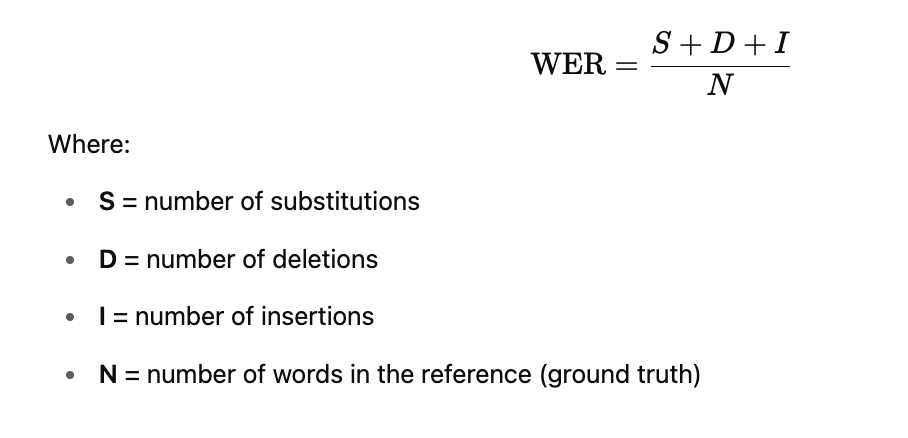

Note: You can calculate this metric using jiwer tool.

More details can be found at:

1.   https://pypi.org/project/jiwer/
2.   https://github.com/jitsi/jiwer

Installing required libraries

In [30]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00


In [31]:
import os
import re
import jiwer
import pandas as pd

transcripts_dir = "/content/unzipped_audio_data/127105"


GROUND_TRUTH_FILENAME = "121-127105.trans.txt"


print("\n--- Preparing Ground Truth from Single File ---")

ground_truth_references_dict = {}
ground_truth_file_path = os.path.join(transcripts_dir, GROUND_TRUTH_FILENAME)

if os.path.exists(ground_truth_file_path):
    try:
        with open(ground_truth_file_path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if line:
                    parts = line.split(maxsplit=1)
                    if len(parts) == 2:
                        utt_id = parts[0]
                        ref_text = parts[1]
                        ground_truth_references_dict[utt_id] = ref_text
                    else:
                        print(f"Warning: Skipping malformed line in ground truth file: '{line}'")
        print(f"Loaded {len(ground_truth_references_dict)} ground truth references from '{GROUND_TRUTH_FILENAME}'.")
    except Exception as e:
        print(f"Error reading ground truth file '{GROUND_TRUTH_FILENAME}': {e}. Cannot proceed with WER.")
        ground_truth_references_dict = {} # Clear to prevent further errors
else:
    print(f"Error: Ground truth file '{GROUND_TRUTH_FILENAME}' not found at '{transcripts_dir}'. Cannot calculate WER.")

# --- WER Calculation Logic ---
print("\n--- Calculating Word Error Rate (WER) ---")

if 'df_cleaned_texts' not in locals() or df_cleaned_texts.empty:
    print("Error: 'df_cleaned_texts' DataFrame not found or is empty. Please ensure your pipeline has successfully created it.")
    print("Cannot proceed with WER calculation.")
elif not ground_truth_references_dict:
    print("No ground truth references loaded. Cannot calculate WER.")
else:
    wer_results = []

    # Iterate through the ASR hypotheses from df_cleaned_texts DataFrame
    for index, row in df_cleaned_texts.iterrows():
        transcript_id = str(row['transcript_id']) # Ensure ID is string for dictionary lookup
        hypothesis_text = str(row['cleaned_text'])

        if transcript_id in ground_truth_references_dict:
            reference_text = ground_truth_references_dict[transcript_id]

            # Normalize text for WER comparison
            hypothesis_normalized = re.sub(r'\s+', ' ', hypothesis_text.lower()).strip()
            reference_normalized = re.sub(r'\s+', ' ', reference_text.lower()).strip()

            if not reference_normalized: # Handle empty reference strings
                print(f"Warning: Empty reference text for ID {transcript_id}. Skipping WER calculation for this item.")
                continue
            if not hypothesis_normalized: # Handle empty hypothesis strings
                # If hypothesis is empty but reference is not, WER will be 1.0 (all deletions)
                print(f"Warning: Empty hypothesis text for ID {transcript_id}.")


            try:
                error = jiwer.wer(reference_normalized, hypothesis_normalized)
                wer_results.append((transcript_id, error))
                print(f"File ID: {transcript_id} | WER: {error:.4f}")

            except Exception as e:
                print(f"Error calculating WER for {transcript_id}: {e}. Skipping.")
        else:
            print(f"Warning: No matching ground truth reference found in '{GROUND_TRUTH_FILENAME}' for ASR output ID '{transcript_id}'. Skipping.")

    if wer_results:
        # Calculate overall average WER
        total_wer = sum(wer for _, wer in wer_results)
        average_wer = total_wer / len(wer_results)

        print(f"\n--- Overall Average WER: {average_wer:.4f} ---")

    else:
        print("\nNo WER results were calculated. Ensure file matching and content are correct.")


--- Preparing Ground Truth from Single File ---
Loaded 37 ground truth references from '121-127105.trans.txt'.

--- Calculating Word Error Rate (WER) ---
File ID: 121-127105-0004 | WER: 1.0000
File ID: 121-127105-0029 | WER: 0.6250
File ID: 121-127105-0008 | WER: 0.8333
File ID: 121-127105-0031 | WER: 0.5789
File ID: 121-127105-0027 | WER: 0.6667
File ID: 121-127105-0030 | WER: 0.6667
File ID: 121-127105-0018 | WER: 0.8750
File ID: 121-127105-0020 | WER: 0.6829
File ID: 121-127105-0003 | WER: 0.7222
File ID: 121-127105-0010 | WER: 0.9000
File ID: 121-127105-0001 | WER: 0.8000
File ID: 121-127105-0005 | WER: 0.7000
File ID: 121-127105-0019 | WER: 0.6364
File ID: 121-127105-0034 | WER: 0.7778
File ID: 121-127105-0022 | WER: 0.8125
File ID: 121-127105-0025 | WER: 0.7857
File ID: 121-127105-0024 | WER: 0.7292
File ID: 121-127105-0009 | WER: 0.8571
File ID: 121-127105-0007 | WER: 0.6667
File ID: 121-127105-0012 | WER: 0.8947
File ID: 121-127105-0035 | WER: 0.8333
File ID: 121-127105-0006 |

The average WER of 0.7594 represents the overall accuracy of the ASR system against the ground truth.